In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

Number of atoms  Relative number of N  atoms  \
Structure                                                 
"1Co"                  101                       0.0297   
"2Co"                  107                       0.0280   
"3Co"                  113                       0.0265   
"4Co"                  104                       0.0288   
"5Co"                  110                       0.0273   
...                    ...                          ...   
"1052Co"                86                       0.0349   
"1053Co"                74                       0.0405   
"1054Co"                80                       0.0375   
"1055Co"                86                       0.0349   
"1056Co"                77                       0.0390   

           Relative number of Cl atoms  Wiener index  \
Structure                                              
"1Co"                           0.0198         26631   
"2Co"                           0.0187         29652   
"3Co"                           0.0177         32339   
"4Co"                           0.0192         28065   
"5Co"                           0.0182         31138   
...                                ...           ...   
"1052Co"                        0.0233         17187   
"1053Co"                        0.0270         13291   
"1054Co"                        0.0250         15195   
"1055Co"                        0.0233         17187   
"1056Co"                        0.0260         14257   

           Kier&Hall index (order 3)  Average Information content (order 0)  \
Structure                                                                     
"1Co"                         9.9558                                 1.6397   
"2Co"                        10.4813                                 1.6785   
"3Co"                        10.8588                                 1.6722   
"4Co"                        10.1517                                 1.6509   
"5Co"                        10.6903                                 1.6850   
...                              ...                                    ...   
"1052Co"                      8.0898                                 1.7691   
"1053Co"                      7.1869                                 1.7552   
"1054Co"                      7.7123                                 1.7671   
"1055Co"                      8.0898                                 1.7691   
"1056Co"                      7.3828                                 1.7627   

           Balaban index  Max partial charge for a N  atom [Zefirov's PC]  \
Structure                                                                   
"1Co"             0.8438                                          -0.0893   
"2Co"             0.9663                                          -0.0893   
"3Co"             0.8453                                          -0.0892   
"4Co"             0.8427                                          -0.0893   
"5Co"             0.9670                                          -0.0893   
...                  ...                                              ...   
"1052Co"          0.9049                                          -0.0892   
"1053Co"          0.8931                                          -0.0893   
"1054Co"          0.8967                                          -0.0893   
"1055Co"          0.9049                                          -0.0892   
"1056Co"          0.8938                                          -0.0893   

           Min partial charge for a N  atom [Zefirov's PC]  \
Structure                                                    
"1Co"                                              -0.0926   
"2Co"                                              -0.0924   
"3Co"                                              -0.0923   
"4Co"                                              -0.0926   
"5Co"                                              -0.0924   
...                                               

In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [1445]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 5, shuffle=True)

In [1446]:
x_test.shape

(212, 29)

In [1447]:
x_train.shape

(844, 29)

In [1448]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [1449]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [1450]:
#cb.CatBoostRegressor?

In [1451]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [1452]:
regressor.fit(train_dataset)

0:	learn: 0.4649773	total: 31.3ms	remaining: 31.3s
1:	learn: 0.4466223	total: 68.5ms	remaining: 34.2s
2:	learn: 0.4316108	total: 105ms	remaining: 35s
3:	learn: 0.4165164	total: 133ms	remaining: 33.1s
4:	learn: 0.4025716	total: 176ms	remaining: 35s
5:	learn: 0.3889210	total: 218ms	remaining: 36.1s
6:	learn: 0.3789791	total: 265ms	remaining: 37.6s
7:	learn: 0.3689306	total: 303ms	remaining: 37.6s
8:	learn: 0.3594006	total: 354ms	remaining: 39s
9:	learn: 0.3503157	total: 403ms	remaining: 39.9s
10:	learn: 0.3418329	total: 439ms	remaining: 39.5s
11:	learn: 0.3338503	total: 483ms	remaining: 39.7s
12:	learn: 0.3277882	total: 531ms	remaining: 40.3s
13:	learn: 0.3211225	total: 570ms	remaining: 40.2s
14:	learn: 0.3166347	total: 611ms	remaining: 40.1s
15:	learn: 0.3091373	total: 654ms	remaining: 40.2s
16:	learn: 0.3052479	total: 702ms	remaining: 40.6s
17:	learn: 0.3002098	total: 766ms	remaining: 41.8s
18:	learn: 0.2962607	total: 828ms	remaining: 42.8s
19:	learn: 0.2919995	total: 870ms	remaining: 

162:	learn: 0.0991421	total: 5.22s	remaining: 26.8s
163:	learn: 0.0986167	total: 5.25s	remaining: 26.8s
164:	learn: 0.0976540	total: 5.28s	remaining: 26.7s
165:	learn: 0.0965902	total: 5.31s	remaining: 26.7s
166:	learn: 0.0958870	total: 5.34s	remaining: 26.6s
167:	learn: 0.0952488	total: 5.36s	remaining: 26.5s
168:	learn: 0.0949799	total: 5.38s	remaining: 26.5s
169:	learn: 0.0944133	total: 5.4s	remaining: 26.4s
170:	learn: 0.0934659	total: 5.42s	remaining: 26.3s
171:	learn: 0.0929485	total: 5.45s	remaining: 26.2s
172:	learn: 0.0921637	total: 5.47s	remaining: 26.2s
173:	learn: 0.0920444	total: 5.5s	remaining: 26.1s
174:	learn: 0.0912301	total: 5.52s	remaining: 26s
175:	learn: 0.0903368	total: 5.54s	remaining: 26s
176:	learn: 0.0898082	total: 5.57s	remaining: 25.9s
177:	learn: 0.0892272	total: 5.59s	remaining: 25.8s
178:	learn: 0.0884635	total: 5.61s	remaining: 25.7s
179:	learn: 0.0883868	total: 5.63s	remaining: 25.7s
180:	learn: 0.0879926	total: 5.66s	remaining: 25.6s
181:	learn: 0.0872

322:	learn: 0.0417050	total: 9.15s	remaining: 19.2s
323:	learn: 0.0413786	total: 9.17s	remaining: 19.1s
324:	learn: 0.0413610	total: 9.2s	remaining: 19.1s
325:	learn: 0.0412216	total: 9.22s	remaining: 19.1s
326:	learn: 0.0410176	total: 9.24s	remaining: 19s
327:	learn: 0.0407793	total: 9.27s	remaining: 19s
328:	learn: 0.0406470	total: 9.29s	remaining: 19s
329:	learn: 0.0405193	total: 9.32s	remaining: 18.9s
330:	learn: 0.0402823	total: 9.34s	remaining: 18.9s
331:	learn: 0.0401420	total: 9.36s	remaining: 18.8s
332:	learn: 0.0400225	total: 9.39s	remaining: 18.8s
333:	learn: 0.0399279	total: 9.41s	remaining: 18.8s
334:	learn: 0.0397169	total: 9.43s	remaining: 18.7s
335:	learn: 0.0394420	total: 9.46s	remaining: 18.7s
336:	learn: 0.0393076	total: 9.48s	remaining: 18.7s
337:	learn: 0.0392438	total: 9.51s	remaining: 18.6s
338:	learn: 0.0389511	total: 9.53s	remaining: 18.6s
339:	learn: 0.0388304	total: 9.55s	remaining: 18.5s
340:	learn: 0.0387640	total: 9.58s	remaining: 18.5s
341:	learn: 0.03860

481:	learn: 0.0224133	total: 13.4s	remaining: 14.4s
482:	learn: 0.0222993	total: 13.4s	remaining: 14.4s
483:	learn: 0.0222344	total: 13.5s	remaining: 14.4s
484:	learn: 0.0221134	total: 13.5s	remaining: 14.3s
485:	learn: 0.0220065	total: 13.5s	remaining: 14.3s
486:	learn: 0.0219176	total: 13.5s	remaining: 14.3s
487:	learn: 0.0218356	total: 13.6s	remaining: 14.2s
488:	learn: 0.0217594	total: 13.6s	remaining: 14.2s
489:	learn: 0.0216632	total: 13.6s	remaining: 14.2s
490:	learn: 0.0215718	total: 13.6s	remaining: 14.1s
491:	learn: 0.0214355	total: 13.7s	remaining: 14.1s
492:	learn: 0.0213850	total: 13.7s	remaining: 14.1s
493:	learn: 0.0213497	total: 13.7s	remaining: 14s
494:	learn: 0.0212721	total: 13.7s	remaining: 14s
495:	learn: 0.0211938	total: 13.7s	remaining: 14s
496:	learn: 0.0210983	total: 13.8s	remaining: 13.9s
497:	learn: 0.0210070	total: 13.8s	remaining: 13.9s
498:	learn: 0.0209506	total: 13.8s	remaining: 13.9s
499:	learn: 0.0208833	total: 13.8s	remaining: 13.8s
500:	learn: 0.0208

642:	learn: 0.0135648	total: 17.3s	remaining: 9.63s
643:	learn: 0.0135621	total: 17.4s	remaining: 9.6s
644:	learn: 0.0135339	total: 17.4s	remaining: 9.57s
645:	learn: 0.0134958	total: 17.4s	remaining: 9.54s
646:	learn: 0.0134563	total: 17.4s	remaining: 9.52s
647:	learn: 0.0134423	total: 17.5s	remaining: 9.49s
648:	learn: 0.0134049	total: 17.5s	remaining: 9.46s
649:	learn: 0.0133876	total: 17.5s	remaining: 9.43s
650:	learn: 0.0133267	total: 17.5s	remaining: 9.4s
651:	learn: 0.0132973	total: 17.6s	remaining: 9.37s
652:	learn: 0.0132662	total: 17.6s	remaining: 9.34s
653:	learn: 0.0132598	total: 17.6s	remaining: 9.31s
654:	learn: 0.0132135	total: 17.6s	remaining: 9.29s
655:	learn: 0.0131729	total: 17.7s	remaining: 9.26s
656:	learn: 0.0131703	total: 17.7s	remaining: 9.23s
657:	learn: 0.0131585	total: 17.7s	remaining: 9.2s
658:	learn: 0.0131039	total: 17.7s	remaining: 9.17s
659:	learn: 0.0130634	total: 17.7s	remaining: 9.14s
660:	learn: 0.0130466	total: 17.8s	remaining: 9.11s
661:	learn: 0.0

809:	learn: 0.0100466	total: 21.2s	remaining: 4.98s
810:	learn: 0.0100356	total: 21.3s	remaining: 4.96s
811:	learn: 0.0100276	total: 21.3s	remaining: 4.93s
812:	learn: 0.0100127	total: 21.3s	remaining: 4.91s
813:	learn: 0.0100085	total: 21.3s	remaining: 4.88s
814:	learn: 0.0099935	total: 21.4s	remaining: 4.85s
815:	learn: 0.0099921	total: 21.4s	remaining: 4.82s
816:	learn: 0.0099885	total: 21.4s	remaining: 4.79s
817:	learn: 0.0099773	total: 21.4s	remaining: 4.77s
818:	learn: 0.0099606	total: 21.5s	remaining: 4.74s
819:	learn: 0.0099517	total: 21.5s	remaining: 4.72s
820:	learn: 0.0099403	total: 21.5s	remaining: 4.69s
821:	learn: 0.0099289	total: 21.5s	remaining: 4.67s
822:	learn: 0.0099103	total: 21.6s	remaining: 4.64s
823:	learn: 0.0098865	total: 21.6s	remaining: 4.61s
824:	learn: 0.0098778	total: 21.6s	remaining: 4.58s
825:	learn: 0.0098724	total: 21.6s	remaining: 4.56s
826:	learn: 0.0098579	total: 21.7s	remaining: 4.53s
827:	learn: 0.0098523	total: 21.7s	remaining: 4.5s
828:	learn: 0

973:	learn: 0.0088171	total: 25.1s	remaining: 671ms
974:	learn: 0.0088162	total: 25.2s	remaining: 645ms
975:	learn: 0.0088126	total: 25.2s	remaining: 619ms
976:	learn: 0.0088048	total: 25.2s	remaining: 593ms
977:	learn: 0.0088003	total: 25.2s	remaining: 568ms
978:	learn: 0.0087942	total: 25.3s	remaining: 542ms
979:	learn: 0.0087891	total: 25.3s	remaining: 516ms
980:	learn: 0.0087859	total: 25.3s	remaining: 490ms
981:	learn: 0.0087799	total: 25.3s	remaining: 464ms
982:	learn: 0.0087796	total: 25.4s	remaining: 439ms
983:	learn: 0.0087772	total: 25.4s	remaining: 413ms
984:	learn: 0.0087737	total: 25.4s	remaining: 387ms
985:	learn: 0.0087676	total: 25.4s	remaining: 361ms
986:	learn: 0.0087654	total: 25.4s	remaining: 335ms
987:	learn: 0.0087606	total: 25.5s	remaining: 309ms
988:	learn: 0.0087604	total: 25.5s	remaining: 284ms
989:	learn: 0.0087528	total: 25.5s	remaining: 258ms
990:	learn: 0.0087470	total: 25.5s	remaining: 232ms
991:	learn: 0.0087467	total: 25.6s	remaining: 206ms
992:	learn: 

In [1453]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:26.250000


In [1454]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.10000000149011612


In [1455]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [1456]:
y_pred_train = regressor.predict(x_train)

In [1457]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [1458]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [1459]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.15681283551765773
MSE is 0.053739667733545424
R2 score is 0.786167348959492


In [1460]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [1461]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.002975965776871909
MSE is 7.584545209055387e-05
R2 score is 0.9996751895855928


In [1462]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

0:	learn: 0.4602959	total: 28.4ms	remaining: 28.4s
1:	learn: 0.4432385	total: 49.3ms	remaining: 24.6s
2:	learn: 0.4273518	total: 78.4ms	remaining: 26.1s
3:	learn: 0.4108660	total: 100ms	remaining: 24.9s
4:	learn: 0.3981463	total: 132ms	remaining: 26.2s
5:	learn: 0.3870992	total: 165ms	remaining: 27.3s
6:	learn: 0.3753731	total: 187ms	remaining: 26.5s
7:	learn: 0.3652353	total: 207ms	remaining: 25.6s
8:	learn: 0.3571270	total: 227ms	remaining: 25s
9:	learn: 0.3492484	total: 256ms	remaining: 25.3s
10:	learn: 0.3414667	total: 281ms	remaining: 25.2s
11:	learn: 0.3352168	total: 312ms	remaining: 25.6s
12:	learn: 0.3285338	total: 332ms	remaining: 25.2s
13:	learn: 0.3229063	total: 358ms	remaining: 25.2s
14:	learn: 0.3179922	total: 388ms	remaining: 25.5s
15:	learn: 0.3126140	total: 409ms	remaining: 25.2s
16:	learn: 0.3072883	total: 430ms	remaining: 24.8s
17:	learn: 0.3012121	total: 449ms	remaining: 24.5s
18:	learn: 0.2967972	total: 484ms	remaining: 25s
19:	learn: 0.2928348	total: 507ms	remainin

166:	learn: 0.0828219	total: 4.46s	remaining: 22.2s
167:	learn: 0.0825846	total: 4.48s	remaining: 22.2s
168:	learn: 0.0821700	total: 4.51s	remaining: 22.2s
169:	learn: 0.0815363	total: 4.54s	remaining: 22.2s
170:	learn: 0.0811624	total: 4.56s	remaining: 22.1s
171:	learn: 0.0806213	total: 4.58s	remaining: 22.1s
172:	learn: 0.0803677	total: 4.6s	remaining: 22s
173:	learn: 0.0796090	total: 4.62s	remaining: 22s
174:	learn: 0.0789643	total: 4.64s	remaining: 21.9s
175:	learn: 0.0788787	total: 4.67s	remaining: 21.9s
176:	learn: 0.0783588	total: 4.69s	remaining: 21.8s
177:	learn: 0.0775444	total: 4.71s	remaining: 21.8s
178:	learn: 0.0770682	total: 4.73s	remaining: 21.7s
179:	learn: 0.0766359	total: 4.76s	remaining: 21.7s
180:	learn: 0.0761200	total: 4.78s	remaining: 21.6s
181:	learn: 0.0756702	total: 4.8s	remaining: 21.6s
182:	learn: 0.0754477	total: 4.82s	remaining: 21.5s
183:	learn: 0.0749489	total: 4.84s	remaining: 21.5s
184:	learn: 0.0740658	total: 4.86s	remaining: 21.4s
185:	learn: 0.0733

325:	learn: 0.0332126	total: 8.2s	remaining: 17s
326:	learn: 0.0329732	total: 8.22s	remaining: 16.9s
327:	learn: 0.0326765	total: 8.25s	remaining: 16.9s
328:	learn: 0.0324829	total: 8.28s	remaining: 16.9s
329:	learn: 0.0322604	total: 8.3s	remaining: 16.9s
330:	learn: 0.0321310	total: 8.32s	remaining: 16.8s
331:	learn: 0.0319490	total: 8.34s	remaining: 16.8s
332:	learn: 0.0319233	total: 8.36s	remaining: 16.8s
333:	learn: 0.0318050	total: 8.38s	remaining: 16.7s
334:	learn: 0.0317280	total: 8.41s	remaining: 16.7s
335:	learn: 0.0314467	total: 8.43s	remaining: 16.7s
336:	learn: 0.0311820	total: 8.45s	remaining: 16.6s
337:	learn: 0.0309948	total: 8.47s	remaining: 16.6s
338:	learn: 0.0307262	total: 8.49s	remaining: 16.6s
339:	learn: 0.0305684	total: 8.51s	remaining: 16.5s
340:	learn: 0.0304115	total: 8.53s	remaining: 16.5s
341:	learn: 0.0303583	total: 8.55s	remaining: 16.5s
342:	learn: 0.0303280	total: 8.57s	remaining: 16.4s
343:	learn: 0.0301903	total: 8.6s	remaining: 16.4s
344:	learn: 0.030

492:	learn: 0.0166839	total: 11.8s	remaining: 12.2s
493:	learn: 0.0166041	total: 11.9s	remaining: 12.2s
494:	learn: 0.0165663	total: 11.9s	remaining: 12.1s
495:	learn: 0.0164601	total: 11.9s	remaining: 12.1s
496:	learn: 0.0164469	total: 11.9s	remaining: 12.1s
497:	learn: 0.0164018	total: 11.9s	remaining: 12s
498:	learn: 0.0163913	total: 12s	remaining: 12s
499:	learn: 0.0163894	total: 12s	remaining: 12s
500:	learn: 0.0163688	total: 12s	remaining: 12s
501:	learn: 0.0163165	total: 12s	remaining: 11.9s
502:	learn: 0.0162655	total: 12s	remaining: 11.9s
503:	learn: 0.0162082	total: 12.1s	remaining: 11.9s
504:	learn: 0.0161709	total: 12.1s	remaining: 11.8s
505:	learn: 0.0161629	total: 12.1s	remaining: 11.8s
506:	learn: 0.0161518	total: 12.1s	remaining: 11.8s
507:	learn: 0.0160962	total: 12.1s	remaining: 11.8s
508:	learn: 0.0160849	total: 12.2s	remaining: 11.7s
509:	learn: 0.0160545	total: 12.2s	remaining: 11.7s
510:	learn: 0.0160093	total: 12.2s	remaining: 11.7s
511:	learn: 0.0159573	total: 1

660:	learn: 0.0110975	total: 15.4s	remaining: 7.91s
661:	learn: 0.0110857	total: 15.4s	remaining: 7.88s
662:	learn: 0.0110791	total: 15.5s	remaining: 7.86s
663:	learn: 0.0110599	total: 15.5s	remaining: 7.83s
664:	learn: 0.0110348	total: 15.5s	remaining: 7.81s
665:	learn: 0.0110156	total: 15.5s	remaining: 7.78s
666:	learn: 0.0109954	total: 15.5s	remaining: 7.76s
667:	learn: 0.0109872	total: 15.6s	remaining: 7.74s
668:	learn: 0.0109601	total: 15.6s	remaining: 7.71s
669:	learn: 0.0109425	total: 15.6s	remaining: 7.69s
670:	learn: 0.0109253	total: 15.6s	remaining: 7.66s
671:	learn: 0.0109230	total: 15.6s	remaining: 7.64s
672:	learn: 0.0109111	total: 15.7s	remaining: 7.61s
673:	learn: 0.0108924	total: 15.7s	remaining: 7.59s
674:	learn: 0.0108736	total: 15.7s	remaining: 7.56s
675:	learn: 0.0108609	total: 15.7s	remaining: 7.54s
676:	learn: 0.0108523	total: 15.8s	remaining: 7.51s
677:	learn: 0.0108462	total: 15.8s	remaining: 7.49s
678:	learn: 0.0108427	total: 15.8s	remaining: 7.46s
679:	learn: 

821:	learn: 0.0097065	total: 18.7s	remaining: 4.06s
822:	learn: 0.0097062	total: 18.8s	remaining: 4.04s
823:	learn: 0.0097003	total: 18.8s	remaining: 4.01s
824:	learn: 0.0096910	total: 18.8s	remaining: 3.99s
825:	learn: 0.0096793	total: 18.8s	remaining: 3.97s
826:	learn: 0.0096748	total: 18.8s	remaining: 3.94s
827:	learn: 0.0096738	total: 18.9s	remaining: 3.92s
828:	learn: 0.0096653	total: 18.9s	remaining: 3.9s
829:	learn: 0.0096588	total: 18.9s	remaining: 3.87s
830:	learn: 0.0096583	total: 18.9s	remaining: 3.85s
831:	learn: 0.0096519	total: 19s	remaining: 3.83s
832:	learn: 0.0096457	total: 19s	remaining: 3.8s
833:	learn: 0.0096417	total: 19s	remaining: 3.78s
834:	learn: 0.0096371	total: 19s	remaining: 3.76s
835:	learn: 0.0096356	total: 19s	remaining: 3.73s
836:	learn: 0.0096306	total: 19.1s	remaining: 3.71s
837:	learn: 0.0096259	total: 19.1s	remaining: 3.69s
838:	learn: 0.0096169	total: 19.1s	remaining: 3.66s
839:	learn: 0.0096106	total: 19.1s	remaining: 3.64s
840:	learn: 0.0096088	to

988:	learn: 0.0092107	total: 22.3s	remaining: 248ms
989:	learn: 0.0092091	total: 22.3s	remaining: 225ms
990:	learn: 0.0092068	total: 22.3s	remaining: 203ms
991:	learn: 0.0092060	total: 22.4s	remaining: 180ms
992:	learn: 0.0092055	total: 22.4s	remaining: 158ms
993:	learn: 0.0092044	total: 22.4s	remaining: 135ms
994:	learn: 0.0092040	total: 22.4s	remaining: 113ms
995:	learn: 0.0092031	total: 22.4s	remaining: 90.1ms
996:	learn: 0.0092027	total: 22.5s	remaining: 67.6ms
997:	learn: 0.0092006	total: 22.5s	remaining: 45ms
998:	learn: 0.0091990	total: 22.5s	remaining: 22.5ms
999:	learn: 0.0091976	total: 22.5s	remaining: 0us
0:	learn: 0.4698135	total: 22.8ms	remaining: 22.8s
1:	learn: 0.4526308	total: 43.7ms	remaining: 21.8s
2:	learn: 0.4387399	total: 64.6ms	remaining: 21.5s
3:	learn: 0.4221542	total: 85.2ms	remaining: 21.2s
4:	learn: 0.4099181	total: 107ms	remaining: 21.3s
5:	learn: 0.3966248	total: 130ms	remaining: 21.6s
6:	learn: 0.3854221	total: 152ms	remaining: 21.5s
7:	learn: 0.3749974	to

153:	learn: 0.0942223	total: 3.26s	remaining: 17.9s
154:	learn: 0.0936318	total: 3.28s	remaining: 17.9s
155:	learn: 0.0932607	total: 3.3s	remaining: 17.9s
156:	learn: 0.0926603	total: 3.32s	remaining: 17.8s
157:	learn: 0.0918221	total: 3.34s	remaining: 17.8s
158:	learn: 0.0908672	total: 3.36s	remaining: 17.8s
159:	learn: 0.0898640	total: 3.38s	remaining: 17.8s
160:	learn: 0.0891379	total: 3.4s	remaining: 17.7s
161:	learn: 0.0885227	total: 3.42s	remaining: 17.7s
162:	learn: 0.0876470	total: 3.44s	remaining: 17.7s
163:	learn: 0.0876014	total: 3.46s	remaining: 17.7s
164:	learn: 0.0871004	total: 3.48s	remaining: 17.6s
165:	learn: 0.0869161	total: 3.51s	remaining: 17.6s
166:	learn: 0.0867532	total: 3.53s	remaining: 17.6s
167:	learn: 0.0860865	total: 3.55s	remaining: 17.6s
168:	learn: 0.0851160	total: 3.57s	remaining: 17.5s
169:	learn: 0.0845850	total: 3.59s	remaining: 17.5s
170:	learn: 0.0836641	total: 3.61s	remaining: 17.5s
171:	learn: 0.0834698	total: 3.63s	remaining: 17.5s
172:	learn: 0.

315:	learn: 0.0372457	total: 6.6s	remaining: 14.3s
316:	learn: 0.0370324	total: 6.62s	remaining: 14.3s
317:	learn: 0.0369070	total: 6.64s	remaining: 14.2s
318:	learn: 0.0368137	total: 6.66s	remaining: 14.2s
319:	learn: 0.0367380	total: 6.68s	remaining: 14.2s
320:	learn: 0.0366003	total: 6.7s	remaining: 14.2s
321:	learn: 0.0364017	total: 6.72s	remaining: 14.1s
322:	learn: 0.0362347	total: 6.74s	remaining: 14.1s
323:	learn: 0.0360711	total: 6.76s	remaining: 14.1s
324:	learn: 0.0358657	total: 6.78s	remaining: 14.1s
325:	learn: 0.0358083	total: 6.8s	remaining: 14.1s
326:	learn: 0.0356027	total: 6.82s	remaining: 14s
327:	learn: 0.0354456	total: 6.84s	remaining: 14s
328:	learn: 0.0354248	total: 6.86s	remaining: 14s
329:	learn: 0.0353676	total: 6.88s	remaining: 14s
330:	learn: 0.0350840	total: 6.9s	remaining: 14s
331:	learn: 0.0348766	total: 6.92s	remaining: 13.9s
332:	learn: 0.0347969	total: 6.94s	remaining: 13.9s
333:	learn: 0.0346149	total: 6.96s	remaining: 13.9s
334:	learn: 0.0344148	tota

478:	learn: 0.0185354	total: 9.9s	remaining: 10.8s
479:	learn: 0.0185202	total: 9.93s	remaining: 10.8s
480:	learn: 0.0184888	total: 9.95s	remaining: 10.7s
481:	learn: 0.0184100	total: 9.97s	remaining: 10.7s
482:	learn: 0.0183480	total: 9.99s	remaining: 10.7s
483:	learn: 0.0182408	total: 10s	remaining: 10.7s
484:	learn: 0.0181403	total: 10s	remaining: 10.7s
485:	learn: 0.0180601	total: 10.1s	remaining: 10.6s
486:	learn: 0.0179919	total: 10.1s	remaining: 10.6s
487:	learn: 0.0179421	total: 10.1s	remaining: 10.6s
488:	learn: 0.0179028	total: 10.1s	remaining: 10.6s
489:	learn: 0.0178570	total: 10.1s	remaining: 10.5s
490:	learn: 0.0177740	total: 10.2s	remaining: 10.5s
491:	learn: 0.0176788	total: 10.2s	remaining: 10.5s
492:	learn: 0.0176082	total: 10.2s	remaining: 10.5s
493:	learn: 0.0175034	total: 10.2s	remaining: 10.5s
494:	learn: 0.0174194	total: 10.2s	remaining: 10.4s
495:	learn: 0.0174137	total: 10.3s	remaining: 10.4s
496:	learn: 0.0173752	total: 10.3s	remaining: 10.4s
497:	learn: 0.017

640:	learn: 0.0118685	total: 13.3s	remaining: 7.45s
641:	learn: 0.0118367	total: 13.3s	remaining: 7.43s
642:	learn: 0.0118315	total: 13.3s	remaining: 7.41s
643:	learn: 0.0117913	total: 13.4s	remaining: 7.38s
644:	learn: 0.0117790	total: 13.4s	remaining: 7.37s
645:	learn: 0.0117488	total: 13.4s	remaining: 7.35s
646:	learn: 0.0117142	total: 13.4s	remaining: 7.34s
647:	learn: 0.0116829	total: 13.5s	remaining: 7.32s
648:	learn: 0.0116615	total: 13.5s	remaining: 7.3s
649:	learn: 0.0116299	total: 13.5s	remaining: 7.28s
650:	learn: 0.0116178	total: 13.5s	remaining: 7.26s
651:	learn: 0.0115975	total: 13.6s	remaining: 7.24s
652:	learn: 0.0115818	total: 13.6s	remaining: 7.22s
653:	learn: 0.0115506	total: 13.6s	remaining: 7.2s
654:	learn: 0.0115401	total: 13.6s	remaining: 7.18s
655:	learn: 0.0115214	total: 13.7s	remaining: 7.16s
656:	learn: 0.0115046	total: 13.7s	remaining: 7.14s
657:	learn: 0.0114969	total: 13.7s	remaining: 7.12s
658:	learn: 0.0114926	total: 13.7s	remaining: 7.1s
659:	learn: 0.0

802:	learn: 0.0098458	total: 17s	remaining: 4.17s
803:	learn: 0.0098306	total: 17s	remaining: 4.14s
804:	learn: 0.0098293	total: 17s	remaining: 4.12s
805:	learn: 0.0098237	total: 17s	remaining: 4.1s
806:	learn: 0.0098207	total: 17.1s	remaining: 4.08s
807:	learn: 0.0098139	total: 17.1s	remaining: 4.06s
808:	learn: 0.0098129	total: 17.1s	remaining: 4.04s
809:	learn: 0.0098120	total: 17.1s	remaining: 4.02s
810:	learn: 0.0098051	total: 17.1s	remaining: 4s
811:	learn: 0.0097982	total: 17.2s	remaining: 3.97s
812:	learn: 0.0097883	total: 17.2s	remaining: 3.95s
813:	learn: 0.0097819	total: 17.2s	remaining: 3.93s
814:	learn: 0.0097749	total: 17.2s	remaining: 3.91s
815:	learn: 0.0097681	total: 17.2s	remaining: 3.89s
816:	learn: 0.0097631	total: 17.3s	remaining: 3.87s
817:	learn: 0.0097623	total: 17.3s	remaining: 3.85s
818:	learn: 0.0097534	total: 17.3s	remaining: 3.83s
819:	learn: 0.0097483	total: 17.3s	remaining: 3.8s
820:	learn: 0.0097451	total: 17.4s	remaining: 3.78s
821:	learn: 0.0097385	tot

962:	learn: 0.0092408	total: 20.3s	remaining: 779ms
963:	learn: 0.0092376	total: 20.3s	remaining: 758ms
964:	learn: 0.0092368	total: 20.3s	remaining: 737ms
965:	learn: 0.0092355	total: 20.3s	remaining: 716ms
966:	learn: 0.0092325	total: 20.4s	remaining: 695ms
967:	learn: 0.0092315	total: 20.4s	remaining: 674ms
968:	learn: 0.0092313	total: 20.4s	remaining: 653ms
969:	learn: 0.0092299	total: 20.4s	remaining: 632ms
970:	learn: 0.0092270	total: 20.5s	remaining: 611ms
971:	learn: 0.0092247	total: 20.5s	remaining: 590ms
972:	learn: 0.0092243	total: 20.5s	remaining: 569ms
973:	learn: 0.0092236	total: 20.5s	remaining: 548ms
974:	learn: 0.0092224	total: 20.5s	remaining: 527ms
975:	learn: 0.0092202	total: 20.6s	remaining: 506ms
976:	learn: 0.0092190	total: 20.6s	remaining: 485ms
977:	learn: 0.0092159	total: 20.6s	remaining: 464ms
978:	learn: 0.0092150	total: 20.6s	remaining: 442ms
979:	learn: 0.0092146	total: 20.6s	remaining: 421ms
980:	learn: 0.0092140	total: 20.7s	remaining: 400ms
981:	learn: 

124:	learn: 0.1119785	total: 3.18s	remaining: 22.3s
125:	learn: 0.1113643	total: 3.2s	remaining: 22.2s
126:	learn: 0.1105017	total: 3.22s	remaining: 22.1s
127:	learn: 0.1097469	total: 3.24s	remaining: 22.1s
128:	learn: 0.1085187	total: 3.26s	remaining: 22s
129:	learn: 0.1084079	total: 3.28s	remaining: 22s
130:	learn: 0.1081292	total: 3.3s	remaining: 21.9s
131:	learn: 0.1078602	total: 3.32s	remaining: 21.9s
132:	learn: 0.1075043	total: 3.34s	remaining: 21.8s
133:	learn: 0.1064775	total: 3.36s	remaining: 21.7s
134:	learn: 0.1056841	total: 3.38s	remaining: 21.7s
135:	learn: 0.1048749	total: 3.41s	remaining: 21.6s
136:	learn: 0.1046179	total: 3.43s	remaining: 21.6s
137:	learn: 0.1035361	total: 3.44s	remaining: 21.5s
138:	learn: 0.1025635	total: 3.47s	remaining: 21.5s
139:	learn: 0.1019277	total: 3.49s	remaining: 21.4s
140:	learn: 0.1015158	total: 3.51s	remaining: 21.4s
141:	learn: 0.1003824	total: 3.53s	remaining: 21.3s
142:	learn: 0.0993668	total: 3.55s	remaining: 21.3s
143:	learn: 0.0992

286:	learn: 0.0448050	total: 7.22s	remaining: 17.9s
287:	learn: 0.0447566	total: 7.25s	remaining: 17.9s
288:	learn: 0.0445812	total: 7.27s	remaining: 17.9s
289:	learn: 0.0443122	total: 7.29s	remaining: 17.9s
290:	learn: 0.0441393	total: 7.32s	remaining: 17.8s
291:	learn: 0.0439129	total: 7.34s	remaining: 17.8s
292:	learn: 0.0436944	total: 7.36s	remaining: 17.8s
293:	learn: 0.0435089	total: 7.39s	remaining: 17.7s
294:	learn: 0.0432055	total: 7.41s	remaining: 17.7s
295:	learn: 0.0430811	total: 7.44s	remaining: 17.7s
296:	learn: 0.0429236	total: 7.47s	remaining: 17.7s
297:	learn: 0.0426128	total: 7.5s	remaining: 17.7s
298:	learn: 0.0423950	total: 7.52s	remaining: 17.6s
299:	learn: 0.0421557	total: 7.54s	remaining: 17.6s
300:	learn: 0.0418659	total: 7.56s	remaining: 17.6s
301:	learn: 0.0418569	total: 7.58s	remaining: 17.5s
302:	learn: 0.0416835	total: 7.6s	remaining: 17.5s
303:	learn: 0.0415714	total: 7.63s	remaining: 17.5s
304:	learn: 0.0413419	total: 7.66s	remaining: 17.5s
305:	learn: 0.

449:	learn: 0.0220075	total: 11.1s	remaining: 13.6s
450:	learn: 0.0218942	total: 11.1s	remaining: 13.6s
451:	learn: 0.0218189	total: 11.2s	remaining: 13.5s
452:	learn: 0.0217661	total: 11.2s	remaining: 13.5s
453:	learn: 0.0217124	total: 11.2s	remaining: 13.5s
454:	learn: 0.0216434	total: 11.2s	remaining: 13.5s
455:	learn: 0.0215203	total: 11.3s	remaining: 13.4s
456:	learn: 0.0214274	total: 11.3s	remaining: 13.4s
457:	learn: 0.0214115	total: 11.3s	remaining: 13.4s
458:	learn: 0.0213028	total: 11.3s	remaining: 13.3s
459:	learn: 0.0211634	total: 11.3s	remaining: 13.3s
460:	learn: 0.0210256	total: 11.4s	remaining: 13.3s
461:	learn: 0.0209335	total: 11.4s	remaining: 13.3s
462:	learn: 0.0208536	total: 11.4s	remaining: 13.2s
463:	learn: 0.0207089	total: 11.4s	remaining: 13.2s
464:	learn: 0.0206679	total: 11.4s	remaining: 13.2s
465:	learn: 0.0205947	total: 11.5s	remaining: 13.1s
466:	learn: 0.0204938	total: 11.5s	remaining: 13.1s
467:	learn: 0.0204620	total: 11.6s	remaining: 13.2s
468:	learn: 

617:	learn: 0.0133603	total: 15.3s	remaining: 9.44s
618:	learn: 0.0133325	total: 15.3s	remaining: 9.41s
619:	learn: 0.0133193	total: 15.3s	remaining: 9.38s
620:	learn: 0.0133001	total: 15.3s	remaining: 9.36s
621:	learn: 0.0132854	total: 15.4s	remaining: 9.33s
622:	learn: 0.0132469	total: 15.4s	remaining: 9.3s
623:	learn: 0.0132179	total: 15.4s	remaining: 9.28s
624:	learn: 0.0132003	total: 15.4s	remaining: 9.25s
625:	learn: 0.0131461	total: 15.4s	remaining: 9.22s
626:	learn: 0.0130972	total: 15.5s	remaining: 9.2s
627:	learn: 0.0130726	total: 15.5s	remaining: 9.17s
628:	learn: 0.0130462	total: 15.5s	remaining: 9.14s
629:	learn: 0.0130037	total: 15.5s	remaining: 9.12s
630:	learn: 0.0129737	total: 15.5s	remaining: 9.09s
631:	learn: 0.0129549	total: 15.6s	remaining: 9.06s
632:	learn: 0.0129320	total: 15.6s	remaining: 9.04s
633:	learn: 0.0129144	total: 15.6s	remaining: 9.01s
634:	learn: 0.0128793	total: 15.6s	remaining: 8.98s
635:	learn: 0.0128423	total: 15.6s	remaining: 8.95s
636:	learn: 0.

782:	learn: 0.0104379	total: 19.1s	remaining: 5.28s
783:	learn: 0.0104372	total: 19.1s	remaining: 5.26s
784:	learn: 0.0104183	total: 19.1s	remaining: 5.23s
785:	learn: 0.0104036	total: 19.1s	remaining: 5.21s
786:	learn: 0.0103989	total: 19.1s	remaining: 5.18s
787:	learn: 0.0103791	total: 19.2s	remaining: 5.16s
788:	learn: 0.0103789	total: 19.2s	remaining: 5.13s
789:	learn: 0.0103785	total: 19.2s	remaining: 5.1s
790:	learn: 0.0103606	total: 19.2s	remaining: 5.08s
791:	learn: 0.0103507	total: 19.2s	remaining: 5.05s
792:	learn: 0.0103371	total: 19.3s	remaining: 5.03s
793:	learn: 0.0103220	total: 19.3s	remaining: 5s
794:	learn: 0.0103175	total: 19.3s	remaining: 4.97s
795:	learn: 0.0103121	total: 19.3s	remaining: 4.95s
796:	learn: 0.0103000	total: 19.3s	remaining: 4.92s
797:	learn: 0.0102927	total: 19.4s	remaining: 4.9s
798:	learn: 0.0102739	total: 19.4s	remaining: 4.87s
799:	learn: 0.0102677	total: 19.4s	remaining: 4.85s
800:	learn: 0.0102589	total: 19.4s	remaining: 4.82s
801:	learn: 0.010

947:	learn: 0.0094038	total: 22.4s	remaining: 1.23s
948:	learn: 0.0094025	total: 22.5s	remaining: 1.21s
949:	learn: 0.0094011	total: 22.5s	remaining: 1.18s
950:	learn: 0.0093998	total: 22.5s	remaining: 1.16s
951:	learn: 0.0093974	total: 22.5s	remaining: 1.14s
952:	learn: 0.0093962	total: 22.5s	remaining: 1.11s
953:	learn: 0.0093921	total: 22.6s	remaining: 1.09s
954:	learn: 0.0093883	total: 22.6s	remaining: 1.06s
955:	learn: 0.0093839	total: 22.6s	remaining: 1.04s
956:	learn: 0.0093836	total: 22.6s	remaining: 1.02s
957:	learn: 0.0093822	total: 22.6s	remaining: 993ms
958:	learn: 0.0093814	total: 22.7s	remaining: 969ms
959:	learn: 0.0093783	total: 22.7s	remaining: 945ms
960:	learn: 0.0093753	total: 22.7s	remaining: 921ms
961:	learn: 0.0093731	total: 22.7s	remaining: 898ms
962:	learn: 0.0093700	total: 22.7s	remaining: 874ms
963:	learn: 0.0093684	total: 22.8s	remaining: 850ms
964:	learn: 0.0093654	total: 22.8s	remaining: 826ms
965:	learn: 0.0093619	total: 22.8s	remaining: 803ms
966:	learn: 

116:	learn: 0.1251493	total: 2.4s	remaining: 18.1s
117:	learn: 0.1244509	total: 2.42s	remaining: 18.1s
118:	learn: 0.1230988	total: 2.44s	remaining: 18.1s
119:	learn: 0.1224392	total: 2.46s	remaining: 18.1s
120:	learn: 0.1220990	total: 2.48s	remaining: 18s
121:	learn: 0.1208032	total: 2.5s	remaining: 18s
122:	learn: 0.1195237	total: 2.52s	remaining: 18s
123:	learn: 0.1186410	total: 2.54s	remaining: 18s
124:	learn: 0.1178550	total: 2.56s	remaining: 17.9s
125:	learn: 0.1167545	total: 2.58s	remaining: 17.9s
126:	learn: 0.1161062	total: 2.6s	remaining: 17.9s
127:	learn: 0.1152500	total: 2.63s	remaining: 17.9s
128:	learn: 0.1141081	total: 2.65s	remaining: 17.9s
129:	learn: 0.1127183	total: 2.67s	remaining: 17.8s
130:	learn: 0.1115312	total: 2.69s	remaining: 17.8s
131:	learn: 0.1109639	total: 2.71s	remaining: 17.8s
132:	learn: 0.1101922	total: 2.73s	remaining: 17.8s
133:	learn: 0.1091380	total: 2.75s	remaining: 17.8s
134:	learn: 0.1084931	total: 2.77s	remaining: 17.7s
135:	learn: 0.1079218	t

278:	learn: 0.0457072	total: 5.72s	remaining: 14.8s
279:	learn: 0.0455312	total: 5.74s	remaining: 14.8s
280:	learn: 0.0450415	total: 5.76s	remaining: 14.7s
281:	learn: 0.0449160	total: 5.78s	remaining: 14.7s
282:	learn: 0.0447130	total: 5.8s	remaining: 14.7s
283:	learn: 0.0446625	total: 5.82s	remaining: 14.7s
284:	learn: 0.0443216	total: 5.84s	remaining: 14.7s
285:	learn: 0.0441210	total: 5.86s	remaining: 14.6s
286:	learn: 0.0440190	total: 5.88s	remaining: 14.6s
287:	learn: 0.0437350	total: 5.9s	remaining: 14.6s
288:	learn: 0.0436150	total: 5.92s	remaining: 14.6s
289:	learn: 0.0433739	total: 5.94s	remaining: 14.5s
290:	learn: 0.0432030	total: 5.96s	remaining: 14.5s
291:	learn: 0.0431442	total: 5.98s	remaining: 14.5s
292:	learn: 0.0430447	total: 6s	remaining: 14.5s
293:	learn: 0.0428637	total: 6.02s	remaining: 14.5s
294:	learn: 0.0427644	total: 6.04s	remaining: 14.4s
295:	learn: 0.0425724	total: 6.06s	remaining: 14.4s
296:	learn: 0.0421310	total: 6.08s	remaining: 14.4s
297:	learn: 0.041

441:	learn: 0.0212183	total: 9.04s	remaining: 11.4s
442:	learn: 0.0211866	total: 9.06s	remaining: 11.4s
443:	learn: 0.0210144	total: 9.08s	remaining: 11.4s
444:	learn: 0.0209656	total: 9.1s	remaining: 11.3s
445:	learn: 0.0208759	total: 9.12s	remaining: 11.3s
446:	learn: 0.0208036	total: 9.14s	remaining: 11.3s
447:	learn: 0.0207208	total: 9.16s	remaining: 11.3s
448:	learn: 0.0206484	total: 9.18s	remaining: 11.3s
449:	learn: 0.0206033	total: 9.2s	remaining: 11.2s
450:	learn: 0.0204900	total: 9.22s	remaining: 11.2s
451:	learn: 0.0203999	total: 9.24s	remaining: 11.2s
452:	learn: 0.0203772	total: 9.26s	remaining: 11.2s
453:	learn: 0.0201852	total: 9.28s	remaining: 11.2s
454:	learn: 0.0200238	total: 9.3s	remaining: 11.1s
455:	learn: 0.0199629	total: 9.32s	remaining: 11.1s
456:	learn: 0.0199124	total: 9.34s	remaining: 11.1s
457:	learn: 0.0198104	total: 9.36s	remaining: 11.1s
458:	learn: 0.0197769	total: 9.38s	remaining: 11.1s
459:	learn: 0.0197059	total: 9.4s	remaining: 11s
460:	learn: 0.0196

602:	learn: 0.0101879	total: 12.3s	remaining: 8.12s
603:	learn: 0.0101726	total: 12.4s	remaining: 8.1s
604:	learn: 0.0101250	total: 12.4s	remaining: 8.08s
605:	learn: 0.0100905	total: 12.4s	remaining: 8.06s
606:	learn: 0.0100633	total: 12.4s	remaining: 8.04s
607:	learn: 0.0100438	total: 12.4s	remaining: 8.02s
608:	learn: 0.0100382	total: 12.5s	remaining: 8s
609:	learn: 0.0099694	total: 12.5s	remaining: 7.98s
610:	learn: 0.0099662	total: 12.5s	remaining: 7.96s
611:	learn: 0.0099006	total: 12.5s	remaining: 7.94s
612:	learn: 0.0098783	total: 12.5s	remaining: 7.92s
613:	learn: 0.0098253	total: 12.6s	remaining: 7.9s
614:	learn: 0.0097622	total: 12.6s	remaining: 7.88s
615:	learn: 0.0097027	total: 12.6s	remaining: 7.86s
616:	learn: 0.0096647	total: 12.6s	remaining: 7.83s
617:	learn: 0.0096040	total: 12.6s	remaining: 7.81s
618:	learn: 0.0096006	total: 12.7s	remaining: 7.79s
619:	learn: 0.0095817	total: 12.7s	remaining: 7.77s
620:	learn: 0.0095380	total: 12.7s	remaining: 7.75s
621:	learn: 0.009

764:	learn: 0.0054163	total: 15.7s	remaining: 4.81s
765:	learn: 0.0053858	total: 15.7s	remaining: 4.79s
766:	learn: 0.0053530	total: 15.7s	remaining: 4.77s
767:	learn: 0.0053232	total: 15.7s	remaining: 4.75s
768:	learn: 0.0053208	total: 15.7s	remaining: 4.73s
769:	learn: 0.0053005	total: 15.8s	remaining: 4.71s
770:	learn: 0.0052928	total: 15.8s	remaining: 4.69s
771:	learn: 0.0052767	total: 15.8s	remaining: 4.67s
772:	learn: 0.0052625	total: 15.8s	remaining: 4.64s
773:	learn: 0.0052491	total: 15.8s	remaining: 4.62s
774:	learn: 0.0052457	total: 15.9s	remaining: 4.6s
775:	learn: 0.0052431	total: 15.9s	remaining: 4.58s
776:	learn: 0.0052285	total: 15.9s	remaining: 4.56s
777:	learn: 0.0051993	total: 15.9s	remaining: 4.54s
778:	learn: 0.0051850	total: 15.9s	remaining: 4.52s
779:	learn: 0.0051778	total: 16s	remaining: 4.5s
780:	learn: 0.0051568	total: 16s	remaining: 4.48s
781:	learn: 0.0051488	total: 16s	remaining: 4.46s
782:	learn: 0.0051468	total: 16s	remaining: 4.44s
783:	learn: 0.0051224	

928:	learn: 0.0029316	total: 19s	remaining: 1.45s
929:	learn: 0.0029139	total: 19s	remaining: 1.43s
930:	learn: 0.0028936	total: 19s	remaining: 1.41s
931:	learn: 0.0028759	total: 19.1s	remaining: 1.39s
932:	learn: 0.0028660	total: 19.1s	remaining: 1.37s
933:	learn: 0.0028651	total: 19.1s	remaining: 1.35s
934:	learn: 0.0028572	total: 19.1s	remaining: 1.33s
935:	learn: 0.0028355	total: 19.1s	remaining: 1.31s
936:	learn: 0.0028199	total: 19.2s	remaining: 1.29s
937:	learn: 0.0028165	total: 19.2s	remaining: 1.27s
938:	learn: 0.0028021	total: 19.2s	remaining: 1.25s
939:	learn: 0.0027971	total: 19.2s	remaining: 1.23s
940:	learn: 0.0027887	total: 19.2s	remaining: 1.21s
941:	learn: 0.0027737	total: 19.3s	remaining: 1.19s
942:	learn: 0.0027570	total: 19.3s	remaining: 1.17s
943:	learn: 0.0027531	total: 19.3s	remaining: 1.14s
944:	learn: 0.0027517	total: 19.3s	remaining: 1.12s
945:	learn: 0.0027511	total: 19.3s	remaining: 1.1s
946:	learn: 0.0027439	total: 19.4s	remaining: 1.08s
947:	learn: 0.00273

97:	learn: 0.1439051	total: 1.99s	remaining: 18.4s
98:	learn: 0.1435439	total: 2.01s	remaining: 18.3s
99:	learn: 0.1428262	total: 2.03s	remaining: 18.3s
100:	learn: 0.1412421	total: 2.05s	remaining: 18.3s
101:	learn: 0.1405527	total: 2.07s	remaining: 18.3s
102:	learn: 0.1404031	total: 2.09s	remaining: 18.2s
103:	learn: 0.1386345	total: 2.12s	remaining: 18.2s
104:	learn: 0.1385255	total: 2.13s	remaining: 18.2s
105:	learn: 0.1380680	total: 2.15s	remaining: 18.2s
106:	learn: 0.1366265	total: 2.17s	remaining: 18.2s
107:	learn: 0.1363491	total: 2.2s	remaining: 18.1s
108:	learn: 0.1348603	total: 2.22s	remaining: 18.1s
109:	learn: 0.1344078	total: 2.24s	remaining: 18.1s
110:	learn: 0.1342921	total: 2.26s	remaining: 18.1s
111:	learn: 0.1337302	total: 2.28s	remaining: 18.1s
112:	learn: 0.1336539	total: 2.3s	remaining: 18s
113:	learn: 0.1322244	total: 2.32s	remaining: 18s
114:	learn: 0.1316683	total: 2.34s	remaining: 18s
115:	learn: 0.1305790	total: 2.36s	remaining: 18s
116:	learn: 0.1286402	tot

260:	learn: 0.0538308	total: 5.3s	remaining: 15s
261:	learn: 0.0534642	total: 5.33s	remaining: 15s
262:	learn: 0.0532632	total: 5.35s	remaining: 15s
263:	learn: 0.0529098	total: 5.37s	remaining: 15s
264:	learn: 0.0526230	total: 5.39s	remaining: 14.9s
265:	learn: 0.0521183	total: 5.41s	remaining: 14.9s
266:	learn: 0.0517725	total: 5.43s	remaining: 14.9s
267:	learn: 0.0513171	total: 5.45s	remaining: 14.9s
268:	learn: 0.0508001	total: 5.47s	remaining: 14.9s
269:	learn: 0.0503194	total: 5.49s	remaining: 14.8s
270:	learn: 0.0502287	total: 5.51s	remaining: 14.8s
271:	learn: 0.0500206	total: 5.53s	remaining: 14.8s
272:	learn: 0.0498701	total: 5.55s	remaining: 14.8s
273:	learn: 0.0494814	total: 5.57s	remaining: 14.8s
274:	learn: 0.0492309	total: 5.59s	remaining: 14.8s
275:	learn: 0.0490762	total: 5.62s	remaining: 14.7s
276:	learn: 0.0489579	total: 5.64s	remaining: 14.7s
277:	learn: 0.0485426	total: 5.66s	remaining: 14.7s
278:	learn: 0.0482138	total: 5.67s	remaining: 14.7s
279:	learn: 0.0479675

423:	learn: 0.0235813	total: 8.62s	remaining: 11.7s
424:	learn: 0.0234611	total: 8.64s	remaining: 11.7s
425:	learn: 0.0232022	total: 8.66s	remaining: 11.7s
426:	learn: 0.0229952	total: 8.68s	remaining: 11.7s
427:	learn: 0.0228953	total: 8.7s	remaining: 11.6s
428:	learn: 0.0227990	total: 8.72s	remaining: 11.6s
429:	learn: 0.0226930	total: 8.74s	remaining: 11.6s
430:	learn: 0.0226857	total: 8.76s	remaining: 11.6s
431:	learn: 0.0225310	total: 8.78s	remaining: 11.5s
432:	learn: 0.0225222	total: 8.8s	remaining: 11.5s
433:	learn: 0.0224340	total: 8.83s	remaining: 11.5s
434:	learn: 0.0223667	total: 8.85s	remaining: 11.5s
435:	learn: 0.0222475	total: 8.87s	remaining: 11.5s
436:	learn: 0.0221239	total: 8.89s	remaining: 11.5s
437:	learn: 0.0220639	total: 8.91s	remaining: 11.4s
438:	learn: 0.0220549	total: 8.93s	remaining: 11.4s
439:	learn: 0.0219498	total: 8.95s	remaining: 11.4s
440:	learn: 0.0217602	total: 8.97s	remaining: 11.4s
441:	learn: 0.0216791	total: 8.99s	remaining: 11.4s
442:	learn: 0.

585:	learn: 0.0117232	total: 11.9s	remaining: 8.42s
586:	learn: 0.0116569	total: 11.9s	remaining: 8.4s
587:	learn: 0.0115846	total: 12s	remaining: 8.38s
588:	learn: 0.0114998	total: 12s	remaining: 8.36s
589:	learn: 0.0114368	total: 12s	remaining: 8.34s
590:	learn: 0.0113730	total: 12s	remaining: 8.32s
591:	learn: 0.0113056	total: 12s	remaining: 8.3s
592:	learn: 0.0112543	total: 12.1s	remaining: 8.28s
593:	learn: 0.0112202	total: 12.1s	remaining: 8.26s
594:	learn: 0.0112082	total: 12.1s	remaining: 8.24s
595:	learn: 0.0111349	total: 12.1s	remaining: 8.22s
596:	learn: 0.0110516	total: 12.1s	remaining: 8.2s
597:	learn: 0.0110148	total: 12.2s	remaining: 8.18s
598:	learn: 0.0109465	total: 12.2s	remaining: 8.16s
599:	learn: 0.0109123	total: 12.2s	remaining: 8.14s
600:	learn: 0.0108763	total: 12.2s	remaining: 8.12s
601:	learn: 0.0108714	total: 12.2s	remaining: 8.1s
602:	learn: 0.0108410	total: 12.3s	remaining: 8.08s
603:	learn: 0.0107669	total: 12.3s	remaining: 8.06s
604:	learn: 0.0107475	tota

748:	learn: 0.0059653	total: 15.2s	remaining: 5.11s
749:	learn: 0.0059316	total: 15.3s	remaining: 5.08s
750:	learn: 0.0059006	total: 15.3s	remaining: 5.06s
751:	learn: 0.0058538	total: 15.3s	remaining: 5.04s
752:	learn: 0.0058046	total: 15.3s	remaining: 5.02s
753:	learn: 0.0058011	total: 15.3s	remaining: 5s
754:	learn: 0.0057794	total: 15.4s	remaining: 4.98s
755:	learn: 0.0057639	total: 15.4s	remaining: 4.96s
756:	learn: 0.0057539	total: 15.4s	remaining: 4.94s
757:	learn: 0.0057382	total: 15.4s	remaining: 4.92s
758:	learn: 0.0057113	total: 15.4s	remaining: 4.9s
759:	learn: 0.0056925	total: 15.5s	remaining: 4.88s
760:	learn: 0.0056839	total: 15.5s	remaining: 4.86s
761:	learn: 0.0056689	total: 15.5s	remaining: 4.84s
762:	learn: 0.0056283	total: 15.5s	remaining: 4.82s
763:	learn: 0.0056164	total: 15.5s	remaining: 4.8s
764:	learn: 0.0055803	total: 15.6s	remaining: 4.78s
765:	learn: 0.0055787	total: 15.6s	remaining: 4.76s
766:	learn: 0.0055668	total: 15.6s	remaining: 4.74s
767:	learn: 0.005

910:	learn: 0.0032923	total: 18.5s	remaining: 1.81s
911:	learn: 0.0032846	total: 18.6s	remaining: 1.79s
912:	learn: 0.0032807	total: 18.6s	remaining: 1.77s
913:	learn: 0.0032732	total: 18.6s	remaining: 1.75s
914:	learn: 0.0032684	total: 18.6s	remaining: 1.73s
915:	learn: 0.0032437	total: 18.6s	remaining: 1.71s
916:	learn: 0.0032254	total: 18.7s	remaining: 1.69s
917:	learn: 0.0032223	total: 18.7s	remaining: 1.67s
918:	learn: 0.0032192	total: 18.7s	remaining: 1.65s
919:	learn: 0.0032166	total: 18.7s	remaining: 1.63s
920:	learn: 0.0031918	total: 18.7s	remaining: 1.61s
921:	learn: 0.0031760	total: 18.8s	remaining: 1.59s
922:	learn: 0.0031749	total: 18.8s	remaining: 1.57s
923:	learn: 0.0031524	total: 18.8s	remaining: 1.55s
924:	learn: 0.0031449	total: 18.8s	remaining: 1.53s
925:	learn: 0.0031228	total: 18.8s	remaining: 1.5s
926:	learn: 0.0031162	total: 18.9s	remaining: 1.49s
927:	learn: 0.0031142	total: 18.9s	remaining: 1.47s
928:	learn: 0.0031038	total: 18.9s	remaining: 1.44s
929:	learn: 0

In [1463]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
0:	learn: 0.4602959	total: 25.5ms	remaining: 25.5s
1:	learn: 0.4432385	total: 45.5ms	remaining: 22.7s
2:	learn: 0.4273518	total: 65.8ms	remaining: 21.9s
3:	learn: 0.4108660	total: 86.5ms	remaining: 21.5s
4:	learn: 0.3981463	total: 108ms	remaining: 21.6s
5:	learn: 0.3870992	total: 131ms	remaining: 21.7s
6:	learn: 0.3753731	total: 151ms	remaining: 21.5s
7:	learn: 0.3652353	total: 172ms	remaining: 21.3s
8:	learn: 0.3571270	total: 198ms	remaining: 21.8s
9:	learn: 0.3492484	total: 222ms	remaining: 21.9s
10:	learn: 0.3414667	total: 244ms	remaining: 21.9s
11:	learn: 0.3352168	total: 267ms	remaining: 22s
12:	learn: 0.3285338	total: 290ms	remaining: 22s
13:	learn: 0.3229063	total: 312ms	remaining: 22s
14:	learn: 0.3179922	total: 337ms	remaining: 22.1s
15:	learn: 0.3126140	total: 359ms	remaining: 22.1s
16:	learn: 0.3072883	total: 381ms	remaining: 22s
17:	learn: 0.3012121	total: 404ms	remaining: 22s
18:	learn: 0.2967972	total: 4

166:	learn: 0.0828219	total: 3.52s	remaining: 17.6s
167:	learn: 0.0825846	total: 3.54s	remaining: 17.5s
168:	learn: 0.0821700	total: 3.56s	remaining: 17.5s
169:	learn: 0.0815363	total: 3.58s	remaining: 17.5s
170:	learn: 0.0811624	total: 3.6s	remaining: 17.5s
171:	learn: 0.0806213	total: 3.62s	remaining: 17.4s
172:	learn: 0.0803677	total: 3.64s	remaining: 17.4s
173:	learn: 0.0796090	total: 3.66s	remaining: 17.4s
174:	learn: 0.0789643	total: 3.68s	remaining: 17.4s
175:	learn: 0.0788787	total: 3.7s	remaining: 17.3s
176:	learn: 0.0783588	total: 3.73s	remaining: 17.3s
177:	learn: 0.0775444	total: 3.75s	remaining: 17.3s
178:	learn: 0.0770682	total: 3.77s	remaining: 17.3s
179:	learn: 0.0766359	total: 3.79s	remaining: 17.3s
180:	learn: 0.0761200	total: 3.81s	remaining: 17.2s
181:	learn: 0.0756702	total: 3.83s	remaining: 17.2s
182:	learn: 0.0754477	total: 3.85s	remaining: 17.2s
183:	learn: 0.0749489	total: 3.87s	remaining: 17.1s
184:	learn: 0.0740658	total: 3.89s	remaining: 17.1s
185:	learn: 0.

329:	learn: 0.0322604	total: 6.87s	remaining: 14s
330:	learn: 0.0321310	total: 6.89s	remaining: 13.9s
331:	learn: 0.0319490	total: 6.92s	remaining: 13.9s
332:	learn: 0.0319233	total: 6.94s	remaining: 13.9s
333:	learn: 0.0318050	total: 6.96s	remaining: 13.9s
334:	learn: 0.0317280	total: 6.98s	remaining: 13.9s
335:	learn: 0.0314467	total: 7s	remaining: 13.8s
336:	learn: 0.0311820	total: 7.02s	remaining: 13.8s
337:	learn: 0.0309948	total: 7.04s	remaining: 13.8s
338:	learn: 0.0307262	total: 7.06s	remaining: 13.8s
339:	learn: 0.0305684	total: 7.08s	remaining: 13.7s
340:	learn: 0.0304115	total: 7.1s	remaining: 13.7s
341:	learn: 0.0303583	total: 7.12s	remaining: 13.7s
342:	learn: 0.0303280	total: 7.14s	remaining: 13.7s
343:	learn: 0.0301903	total: 7.16s	remaining: 13.7s
344:	learn: 0.0300328	total: 7.18s	remaining: 13.6s
345:	learn: 0.0298648	total: 7.2s	remaining: 13.6s
346:	learn: 0.0297536	total: 7.22s	remaining: 13.6s
347:	learn: 0.0296440	total: 7.24s	remaining: 13.6s
348:	learn: 0.02961

493:	learn: 0.0166041	total: 10.2s	remaining: 10.5s
494:	learn: 0.0165663	total: 10.2s	remaining: 10.4s
495:	learn: 0.0164601	total: 10.3s	remaining: 10.4s
496:	learn: 0.0164469	total: 10.3s	remaining: 10.4s
497:	learn: 0.0164018	total: 10.3s	remaining: 10.4s
498:	learn: 0.0163913	total: 10.3s	remaining: 10.4s
499:	learn: 0.0163894	total: 10.3s	remaining: 10.3s
500:	learn: 0.0163688	total: 10.4s	remaining: 10.3s
501:	learn: 0.0163165	total: 10.4s	remaining: 10.3s
502:	learn: 0.0162655	total: 10.4s	remaining: 10.3s
503:	learn: 0.0162082	total: 10.4s	remaining: 10.3s
504:	learn: 0.0161709	total: 10.4s	remaining: 10.2s
505:	learn: 0.0161629	total: 10.5s	remaining: 10.2s
506:	learn: 0.0161518	total: 10.5s	remaining: 10.2s
507:	learn: 0.0160962	total: 10.5s	remaining: 10.2s
508:	learn: 0.0160849	total: 10.5s	remaining: 10.2s
509:	learn: 0.0160545	total: 10.5s	remaining: 10.1s
510:	learn: 0.0160093	total: 10.6s	remaining: 10.1s
511:	learn: 0.0159573	total: 10.6s	remaining: 10.1s
512:	learn: 

660:	learn: 0.0110975	total: 13.8s	remaining: 7.07s
661:	learn: 0.0110857	total: 13.8s	remaining: 7.05s
662:	learn: 0.0110791	total: 13.8s	remaining: 7.03s
663:	learn: 0.0110599	total: 13.8s	remaining: 7.01s
664:	learn: 0.0110348	total: 13.9s	remaining: 6.99s
665:	learn: 0.0110156	total: 13.9s	remaining: 6.97s
666:	learn: 0.0109954	total: 13.9s	remaining: 6.95s
667:	learn: 0.0109872	total: 13.9s	remaining: 6.92s
668:	learn: 0.0109601	total: 14s	remaining: 6.9s
669:	learn: 0.0109425	total: 14s	remaining: 6.88s
670:	learn: 0.0109253	total: 14s	remaining: 6.86s
671:	learn: 0.0109230	total: 14s	remaining: 6.84s
672:	learn: 0.0109111	total: 14s	remaining: 6.82s
673:	learn: 0.0108924	total: 14.1s	remaining: 6.8s
674:	learn: 0.0108736	total: 14.1s	remaining: 6.78s
675:	learn: 0.0108609	total: 14.1s	remaining: 6.76s
676:	learn: 0.0108523	total: 14.1s	remaining: 6.74s
677:	learn: 0.0108462	total: 14.1s	remaining: 6.71s
678:	learn: 0.0108427	total: 14.2s	remaining: 6.69s
679:	learn: 0.0108323	to

824:	learn: 0.0096910	total: 17.4s	remaining: 3.68s
825:	learn: 0.0096793	total: 17.4s	remaining: 3.66s
826:	learn: 0.0096748	total: 17.4s	remaining: 3.65s
827:	learn: 0.0096738	total: 17.5s	remaining: 3.63s
828:	learn: 0.0096653	total: 17.5s	remaining: 3.61s
829:	learn: 0.0096588	total: 17.5s	remaining: 3.58s
830:	learn: 0.0096583	total: 17.5s	remaining: 3.56s
831:	learn: 0.0096519	total: 17.6s	remaining: 3.54s
832:	learn: 0.0096457	total: 17.6s	remaining: 3.52s
833:	learn: 0.0096417	total: 17.6s	remaining: 3.5s
834:	learn: 0.0096371	total: 17.6s	remaining: 3.48s
835:	learn: 0.0096356	total: 17.7s	remaining: 3.46s
836:	learn: 0.0096306	total: 17.7s	remaining: 3.44s
837:	learn: 0.0096259	total: 17.7s	remaining: 3.42s
838:	learn: 0.0096169	total: 17.7s	remaining: 3.4s
839:	learn: 0.0096106	total: 17.8s	remaining: 3.39s
840:	learn: 0.0096088	total: 17.8s	remaining: 3.37s
841:	learn: 0.0096066	total: 17.8s	remaining: 3.35s
842:	learn: 0.0096056	total: 17.9s	remaining: 3.33s
843:	learn: 0.

984:	learn: 0.0092127	total: 21.3s	remaining: 324ms
985:	learn: 0.0092126	total: 21.3s	remaining: 303ms
986:	learn: 0.0092120	total: 21.4s	remaining: 281ms
987:	learn: 0.0092118	total: 21.4s	remaining: 260ms
988:	learn: 0.0092107	total: 21.4s	remaining: 238ms
989:	learn: 0.0092091	total: 21.4s	remaining: 217ms
990:	learn: 0.0092068	total: 21.5s	remaining: 195ms
991:	learn: 0.0092060	total: 21.5s	remaining: 173ms
992:	learn: 0.0092055	total: 21.5s	remaining: 152ms
993:	learn: 0.0092044	total: 21.5s	remaining: 130ms
994:	learn: 0.0092040	total: 21.6s	remaining: 108ms
995:	learn: 0.0092031	total: 21.6s	remaining: 86.7ms
996:	learn: 0.0092027	total: 21.6s	remaining: 65ms
997:	learn: 0.0092006	total: 21.6s	remaining: 43.3ms
998:	learn: 0.0091990	total: 21.6s	remaining: 21.7ms
999:	learn: 0.0091976	total: 21.7s	remaining: 0us
0:	learn: 0.4698135	total: 22.6ms	remaining: 22.5s
1:	learn: 0.4526308	total: 43.9ms	remaining: 21.9s
2:	learn: 0.4387399	total: 63.9ms	remaining: 21.2s
3:	learn: 0.422

146:	learn: 0.1002159	total: 4.26s	remaining: 24.7s
147:	learn: 0.0991659	total: 4.29s	remaining: 24.7s
148:	learn: 0.0981297	total: 4.32s	remaining: 24.7s
149:	learn: 0.0975730	total: 4.36s	remaining: 24.7s
150:	learn: 0.0968943	total: 4.39s	remaining: 24.7s
151:	learn: 0.0958511	total: 4.41s	remaining: 24.6s
152:	learn: 0.0952179	total: 4.43s	remaining: 24.6s
153:	learn: 0.0942223	total: 4.46s	remaining: 24.5s
154:	learn: 0.0936318	total: 4.49s	remaining: 24.5s
155:	learn: 0.0932607	total: 4.51s	remaining: 24.4s
156:	learn: 0.0926603	total: 4.54s	remaining: 24.4s
157:	learn: 0.0918221	total: 4.56s	remaining: 24.3s
158:	learn: 0.0908672	total: 4.58s	remaining: 24.3s
159:	learn: 0.0898640	total: 4.61s	remaining: 24.2s
160:	learn: 0.0891379	total: 4.63s	remaining: 24.1s
161:	learn: 0.0885227	total: 4.65s	remaining: 24.1s
162:	learn: 0.0876470	total: 4.67s	remaining: 24s
163:	learn: 0.0876014	total: 4.7s	remaining: 24s
164:	learn: 0.0871004	total: 4.72s	remaining: 23.9s
165:	learn: 0.086

312:	learn: 0.0376741	total: 8.17s	remaining: 17.9s
313:	learn: 0.0375754	total: 8.19s	remaining: 17.9s
314:	learn: 0.0374303	total: 8.22s	remaining: 17.9s
315:	learn: 0.0372457	total: 8.24s	remaining: 17.8s
316:	learn: 0.0370324	total: 8.26s	remaining: 17.8s
317:	learn: 0.0369070	total: 8.28s	remaining: 17.8s
318:	learn: 0.0368137	total: 8.3s	remaining: 17.7s
319:	learn: 0.0367380	total: 8.32s	remaining: 17.7s
320:	learn: 0.0366003	total: 8.35s	remaining: 17.7s
321:	learn: 0.0364017	total: 8.37s	remaining: 17.6s
322:	learn: 0.0362347	total: 8.39s	remaining: 17.6s
323:	learn: 0.0360711	total: 8.41s	remaining: 17.6s
324:	learn: 0.0358657	total: 8.44s	remaining: 17.5s
325:	learn: 0.0358083	total: 8.46s	remaining: 17.5s
326:	learn: 0.0356027	total: 8.48s	remaining: 17.5s
327:	learn: 0.0354456	total: 8.5s	remaining: 17.4s
328:	learn: 0.0354248	total: 8.53s	remaining: 17.4s
329:	learn: 0.0353676	total: 8.56s	remaining: 17.4s
330:	learn: 0.0350840	total: 8.59s	remaining: 17.4s
331:	learn: 0.

477:	learn: 0.0186070	total: 11.8s	remaining: 12.9s
478:	learn: 0.0185354	total: 11.9s	remaining: 12.9s
479:	learn: 0.0185202	total: 11.9s	remaining: 12.9s
480:	learn: 0.0184888	total: 11.9s	remaining: 12.8s
481:	learn: 0.0184100	total: 11.9s	remaining: 12.8s
482:	learn: 0.0183480	total: 11.9s	remaining: 12.8s
483:	learn: 0.0182408	total: 12s	remaining: 12.8s
484:	learn: 0.0181403	total: 12s	remaining: 12.7s
485:	learn: 0.0180601	total: 12s	remaining: 12.7s
486:	learn: 0.0179919	total: 12s	remaining: 12.7s
487:	learn: 0.0179421	total: 12.1s	remaining: 12.6s
488:	learn: 0.0179028	total: 12.1s	remaining: 12.6s
489:	learn: 0.0178570	total: 12.1s	remaining: 12.6s
490:	learn: 0.0177740	total: 12.1s	remaining: 12.6s
491:	learn: 0.0176788	total: 12.1s	remaining: 12.5s
492:	learn: 0.0176082	total: 12.2s	remaining: 12.5s
493:	learn: 0.0175034	total: 12.2s	remaining: 12.5s
494:	learn: 0.0174194	total: 12.2s	remaining: 12.4s
495:	learn: 0.0174137	total: 12.2s	remaining: 12.4s
496:	learn: 0.017375

639:	learn: 0.0118942	total: 15.2s	remaining: 8.53s
640:	learn: 0.0118685	total: 15.2s	remaining: 8.51s
641:	learn: 0.0118367	total: 15.2s	remaining: 8.48s
642:	learn: 0.0118315	total: 15.2s	remaining: 8.45s
643:	learn: 0.0117913	total: 15.2s	remaining: 8.43s
644:	learn: 0.0117790	total: 15.3s	remaining: 8.4s
645:	learn: 0.0117488	total: 15.3s	remaining: 8.38s
646:	learn: 0.0117142	total: 15.3s	remaining: 8.35s
647:	learn: 0.0116829	total: 15.3s	remaining: 8.33s
648:	learn: 0.0116615	total: 15.3s	remaining: 8.3s
649:	learn: 0.0116299	total: 15.4s	remaining: 8.28s
650:	learn: 0.0116178	total: 15.4s	remaining: 8.25s
651:	learn: 0.0115975	total: 15.4s	remaining: 8.23s
652:	learn: 0.0115818	total: 15.4s	remaining: 8.2s
653:	learn: 0.0115506	total: 15.5s	remaining: 8.18s
654:	learn: 0.0115401	total: 15.5s	remaining: 8.15s
655:	learn: 0.0115214	total: 15.5s	remaining: 8.12s
656:	learn: 0.0115046	total: 15.5s	remaining: 8.1s
657:	learn: 0.0114969	total: 15.5s	remaining: 8.07s
658:	learn: 0.01

801:	learn: 0.0098488	total: 18.5s	remaining: 4.57s
802:	learn: 0.0098458	total: 18.5s	remaining: 4.54s
803:	learn: 0.0098306	total: 18.5s	remaining: 4.52s
804:	learn: 0.0098293	total: 18.6s	remaining: 4.5s
805:	learn: 0.0098237	total: 18.6s	remaining: 4.47s
806:	learn: 0.0098207	total: 18.6s	remaining: 4.45s
807:	learn: 0.0098139	total: 18.6s	remaining: 4.43s
808:	learn: 0.0098129	total: 18.7s	remaining: 4.4s
809:	learn: 0.0098120	total: 18.7s	remaining: 4.38s
810:	learn: 0.0098051	total: 18.7s	remaining: 4.36s
811:	learn: 0.0097982	total: 18.7s	remaining: 4.33s
812:	learn: 0.0097883	total: 18.7s	remaining: 4.31s
813:	learn: 0.0097819	total: 18.8s	remaining: 4.29s
814:	learn: 0.0097749	total: 18.8s	remaining: 4.26s
815:	learn: 0.0097681	total: 18.8s	remaining: 4.24s
816:	learn: 0.0097631	total: 18.8s	remaining: 4.21s
817:	learn: 0.0097623	total: 18.8s	remaining: 4.19s
818:	learn: 0.0097534	total: 18.9s	remaining: 4.17s
819:	learn: 0.0097483	total: 18.9s	remaining: 4.14s
820:	learn: 0.

966:	learn: 0.0092325	total: 21.9s	remaining: 746ms
967:	learn: 0.0092315	total: 21.9s	remaining: 724ms
968:	learn: 0.0092313	total: 21.9s	remaining: 701ms
969:	learn: 0.0092299	total: 21.9s	remaining: 678ms
970:	learn: 0.0092270	total: 21.9s	remaining: 656ms
971:	learn: 0.0092247	total: 22s	remaining: 633ms
972:	learn: 0.0092243	total: 22s	remaining: 610ms
973:	learn: 0.0092236	total: 22s	remaining: 588ms
974:	learn: 0.0092224	total: 22s	remaining: 565ms
975:	learn: 0.0092202	total: 22.1s	remaining: 542ms
976:	learn: 0.0092190	total: 22.1s	remaining: 520ms
977:	learn: 0.0092159	total: 22.1s	remaining: 497ms
978:	learn: 0.0092150	total: 22.1s	remaining: 474ms
979:	learn: 0.0092146	total: 22.1s	remaining: 452ms
980:	learn: 0.0092140	total: 22.2s	remaining: 429ms
981:	learn: 0.0092135	total: 22.2s	remaining: 406ms
982:	learn: 0.0092116	total: 22.2s	remaining: 384ms
983:	learn: 0.0092101	total: 22.2s	remaining: 361ms
984:	learn: 0.0092086	total: 22.2s	remaining: 339ms
985:	learn: 0.009207

132:	learn: 0.1075043	total: 2.77s	remaining: 18.1s
133:	learn: 0.1064775	total: 2.8s	remaining: 18.1s
134:	learn: 0.1056841	total: 2.83s	remaining: 18.1s
135:	learn: 0.1048749	total: 2.85s	remaining: 18.1s
136:	learn: 0.1046179	total: 2.88s	remaining: 18.1s
137:	learn: 0.1035361	total: 2.9s	remaining: 18.1s
138:	learn: 0.1025635	total: 2.92s	remaining: 18.1s
139:	learn: 0.1019277	total: 2.95s	remaining: 18.1s
140:	learn: 0.1015158	total: 2.97s	remaining: 18.1s
141:	learn: 0.1003824	total: 2.99s	remaining: 18.1s
142:	learn: 0.0993668	total: 3.01s	remaining: 18.1s
143:	learn: 0.0992652	total: 3.04s	remaining: 18s
144:	learn: 0.0984418	total: 3.06s	remaining: 18s
145:	learn: 0.0980547	total: 3.08s	remaining: 18s
146:	learn: 0.0968637	total: 3.1s	remaining: 18s
147:	learn: 0.0959493	total: 3.13s	remaining: 18s
148:	learn: 0.0958724	total: 3.15s	remaining: 18s
149:	learn: 0.0953021	total: 3.17s	remaining: 18s
150:	learn: 0.0952305	total: 3.19s	remaining: 17.9s
151:	learn: 0.0944192	total: 

297:	learn: 0.0426128	total: 6.36s	remaining: 15s
298:	learn: 0.0423950	total: 6.38s	remaining: 15s
299:	learn: 0.0421557	total: 6.4s	remaining: 14.9s
300:	learn: 0.0418659	total: 6.42s	remaining: 14.9s
301:	learn: 0.0418569	total: 6.44s	remaining: 14.9s
302:	learn: 0.0416835	total: 6.46s	remaining: 14.9s
303:	learn: 0.0415714	total: 6.48s	remaining: 14.8s
304:	learn: 0.0413419	total: 6.5s	remaining: 14.8s
305:	learn: 0.0411778	total: 6.53s	remaining: 14.8s
306:	learn: 0.0410023	total: 6.55s	remaining: 14.8s
307:	learn: 0.0408723	total: 6.57s	remaining: 14.8s
308:	learn: 0.0407731	total: 6.59s	remaining: 14.7s
309:	learn: 0.0404227	total: 6.61s	remaining: 14.7s
310:	learn: 0.0402082	total: 6.63s	remaining: 14.7s
311:	learn: 0.0401751	total: 6.65s	remaining: 14.7s
312:	learn: 0.0400554	total: 6.67s	remaining: 14.6s
313:	learn: 0.0399553	total: 6.69s	remaining: 14.6s
314:	learn: 0.0397905	total: 6.71s	remaining: 14.6s
315:	learn: 0.0397264	total: 6.73s	remaining: 14.6s
316:	learn: 0.0394

456:	learn: 0.0214274	total: 10.5s	remaining: 12.4s
457:	learn: 0.0214115	total: 10.5s	remaining: 12.4s
458:	learn: 0.0213028	total: 10.5s	remaining: 12.4s
459:	learn: 0.0211634	total: 10.5s	remaining: 12.4s
460:	learn: 0.0210256	total: 10.6s	remaining: 12.4s
461:	learn: 0.0209335	total: 10.6s	remaining: 12.3s
462:	learn: 0.0208536	total: 10.6s	remaining: 12.3s
463:	learn: 0.0207089	total: 10.6s	remaining: 12.3s
464:	learn: 0.0206679	total: 10.6s	remaining: 12.3s
465:	learn: 0.0205947	total: 10.7s	remaining: 12.2s
466:	learn: 0.0204938	total: 10.7s	remaining: 12.2s
467:	learn: 0.0204620	total: 10.7s	remaining: 12.2s
468:	learn: 0.0203978	total: 10.7s	remaining: 12.2s
469:	learn: 0.0203231	total: 10.8s	remaining: 12.1s
470:	learn: 0.0202982	total: 10.8s	remaining: 12.1s
471:	learn: 0.0201856	total: 10.8s	remaining: 12.1s
472:	learn: 0.0201346	total: 10.8s	remaining: 12.1s
473:	learn: 0.0200905	total: 10.8s	remaining: 12s
474:	learn: 0.0200159	total: 10.9s	remaining: 12s
475:	learn: 0.01

620:	learn: 0.0133001	total: 14.2s	remaining: 8.64s
621:	learn: 0.0132854	total: 14.2s	remaining: 8.62s
622:	learn: 0.0132469	total: 14.2s	remaining: 8.6s
623:	learn: 0.0132179	total: 14.2s	remaining: 8.58s
624:	learn: 0.0132003	total: 14.3s	remaining: 8.55s
625:	learn: 0.0131461	total: 14.3s	remaining: 8.53s
626:	learn: 0.0130972	total: 14.3s	remaining: 8.51s
627:	learn: 0.0130726	total: 14.3s	remaining: 8.48s
628:	learn: 0.0130462	total: 14.3s	remaining: 8.46s
629:	learn: 0.0130037	total: 14.4s	remaining: 8.44s
630:	learn: 0.0129737	total: 14.4s	remaining: 8.41s
631:	learn: 0.0129549	total: 14.4s	remaining: 8.39s
632:	learn: 0.0129320	total: 14.4s	remaining: 8.37s
633:	learn: 0.0129144	total: 14.4s	remaining: 8.34s
634:	learn: 0.0128793	total: 14.5s	remaining: 8.32s
635:	learn: 0.0128423	total: 14.5s	remaining: 8.29s
636:	learn: 0.0128336	total: 14.5s	remaining: 8.27s
637:	learn: 0.0128024	total: 14.5s	remaining: 8.24s
638:	learn: 0.0127853	total: 14.5s	remaining: 8.22s
639:	learn: 0

785:	learn: 0.0104036	total: 17.9s	remaining: 4.86s
786:	learn: 0.0103989	total: 17.9s	remaining: 4.84s
787:	learn: 0.0103791	total: 17.9s	remaining: 4.82s
788:	learn: 0.0103789	total: 17.9s	remaining: 4.8s
789:	learn: 0.0103785	total: 17.9s	remaining: 4.77s
790:	learn: 0.0103606	total: 18s	remaining: 4.75s
791:	learn: 0.0103507	total: 18s	remaining: 4.72s
792:	learn: 0.0103371	total: 18s	remaining: 4.7s
793:	learn: 0.0103220	total: 18s	remaining: 4.68s
794:	learn: 0.0103175	total: 18s	remaining: 4.65s
795:	learn: 0.0103121	total: 18.1s	remaining: 4.63s
796:	learn: 0.0103000	total: 18.1s	remaining: 4.61s
797:	learn: 0.0102927	total: 18.1s	remaining: 4.59s
798:	learn: 0.0102739	total: 18.1s	remaining: 4.56s
799:	learn: 0.0102677	total: 18.2s	remaining: 4.54s
800:	learn: 0.0102589	total: 18.2s	remaining: 4.52s
801:	learn: 0.0102455	total: 18.2s	remaining: 4.49s
802:	learn: 0.0102383	total: 18.2s	remaining: 4.47s
803:	learn: 0.0102344	total: 18.2s	remaining: 4.45s
804:	learn: 0.0102301	to

949:	learn: 0.0094011	total: 21.6s	remaining: 1.14s
950:	learn: 0.0093998	total: 21.6s	remaining: 1.11s
951:	learn: 0.0093974	total: 21.7s	remaining: 1.09s
952:	learn: 0.0093962	total: 21.7s	remaining: 1.07s
953:	learn: 0.0093921	total: 21.7s	remaining: 1.05s
954:	learn: 0.0093883	total: 21.7s	remaining: 1.02s
955:	learn: 0.0093839	total: 21.7s	remaining: 1s
956:	learn: 0.0093836	total: 21.8s	remaining: 978ms
957:	learn: 0.0093822	total: 21.8s	remaining: 955ms
958:	learn: 0.0093814	total: 21.8s	remaining: 933ms
959:	learn: 0.0093783	total: 21.8s	remaining: 910ms
960:	learn: 0.0093753	total: 21.9s	remaining: 887ms
961:	learn: 0.0093731	total: 21.9s	remaining: 864ms
962:	learn: 0.0093700	total: 21.9s	remaining: 841ms
963:	learn: 0.0093684	total: 21.9s	remaining: 819ms
964:	learn: 0.0093654	total: 21.9s	remaining: 796ms
965:	learn: 0.0093619	total: 22s	remaining: 773ms
966:	learn: 0.0093579	total: 22s	remaining: 750ms
967:	learn: 0.0093530	total: 22s	remaining: 728ms
968:	learn: 0.0093519

118:	learn: 0.1230988	total: 2.9s	remaining: 21.5s
119:	learn: 0.1224392	total: 2.92s	remaining: 21.5s
120:	learn: 0.1220990	total: 2.95s	remaining: 21.5s
121:	learn: 0.1208032	total: 2.98s	remaining: 21.4s
122:	learn: 0.1195237	total: 3s	remaining: 21.4s
123:	learn: 0.1186410	total: 3.02s	remaining: 21.4s
124:	learn: 0.1178550	total: 3.05s	remaining: 21.3s
125:	learn: 0.1167545	total: 3.07s	remaining: 21.3s
126:	learn: 0.1161062	total: 3.09s	remaining: 21.2s
127:	learn: 0.1152500	total: 3.12s	remaining: 21.2s
128:	learn: 0.1141081	total: 3.14s	remaining: 21.2s
129:	learn: 0.1127183	total: 3.16s	remaining: 21.1s
130:	learn: 0.1115312	total: 3.18s	remaining: 21.1s
131:	learn: 0.1109639	total: 3.2s	remaining: 21s
132:	learn: 0.1101922	total: 3.22s	remaining: 21s
133:	learn: 0.1091380	total: 3.24s	remaining: 20.9s
134:	learn: 0.1084931	total: 3.26s	remaining: 20.9s
135:	learn: 0.1079218	total: 3.28s	remaining: 20.8s
136:	learn: 0.1075212	total: 3.3s	remaining: 20.8s
137:	learn: 0.1066302	

284:	learn: 0.0443216	total: 6.67s	remaining: 16.7s
285:	learn: 0.0441210	total: 6.69s	remaining: 16.7s
286:	learn: 0.0440190	total: 6.72s	remaining: 16.7s
287:	learn: 0.0437350	total: 6.74s	remaining: 16.7s
288:	learn: 0.0436150	total: 6.77s	remaining: 16.6s
289:	learn: 0.0433739	total: 6.79s	remaining: 16.6s
290:	learn: 0.0432030	total: 6.81s	remaining: 16.6s
291:	learn: 0.0431442	total: 6.83s	remaining: 16.6s
292:	learn: 0.0430447	total: 6.85s	remaining: 16.5s
293:	learn: 0.0428637	total: 6.88s	remaining: 16.5s
294:	learn: 0.0427644	total: 6.9s	remaining: 16.5s
295:	learn: 0.0425724	total: 6.92s	remaining: 16.4s
296:	learn: 0.0421310	total: 6.94s	remaining: 16.4s
297:	learn: 0.0416987	total: 6.96s	remaining: 16.4s
298:	learn: 0.0414759	total: 6.98s	remaining: 16.4s
299:	learn: 0.0412738	total: 7s	remaining: 16.3s
300:	learn: 0.0410530	total: 7.02s	remaining: 16.3s
301:	learn: 0.0408279	total: 7.04s	remaining: 16.3s
302:	learn: 0.0406285	total: 7.06s	remaining: 16.2s
303:	learn: 0.04

451:	learn: 0.0203999	total: 10.4s	remaining: 12.6s
452:	learn: 0.0203772	total: 10.4s	remaining: 12.6s
453:	learn: 0.0201852	total: 10.5s	remaining: 12.6s
454:	learn: 0.0200238	total: 10.5s	remaining: 12.6s
455:	learn: 0.0199629	total: 10.5s	remaining: 12.5s
456:	learn: 0.0199124	total: 10.5s	remaining: 12.5s
457:	learn: 0.0198104	total: 10.6s	remaining: 12.5s
458:	learn: 0.0197769	total: 10.6s	remaining: 12.5s
459:	learn: 0.0197059	total: 10.6s	remaining: 12.4s
460:	learn: 0.0196282	total: 10.6s	remaining: 12.4s
461:	learn: 0.0195012	total: 10.6s	remaining: 12.4s
462:	learn: 0.0193137	total: 10.7s	remaining: 12.4s
463:	learn: 0.0191515	total: 10.7s	remaining: 12.3s
464:	learn: 0.0190818	total: 10.7s	remaining: 12.3s
465:	learn: 0.0189977	total: 10.7s	remaining: 12.3s
466:	learn: 0.0189218	total: 10.7s	remaining: 12.3s
467:	learn: 0.0187886	total: 10.8s	remaining: 12.2s
468:	learn: 0.0186818	total: 10.8s	remaining: 12.2s
469:	learn: 0.0186231	total: 10.8s	remaining: 12.2s
470:	learn: 

616:	learn: 0.0096647	total: 14.3s	remaining: 8.89s
617:	learn: 0.0096040	total: 14.3s	remaining: 8.87s
618:	learn: 0.0096006	total: 14.4s	remaining: 8.85s
619:	learn: 0.0095817	total: 14.4s	remaining: 8.83s
620:	learn: 0.0095380	total: 14.4s	remaining: 8.8s
621:	learn: 0.0094891	total: 14.4s	remaining: 8.78s
622:	learn: 0.0094602	total: 14.5s	remaining: 8.75s
623:	learn: 0.0094430	total: 14.5s	remaining: 8.73s
624:	learn: 0.0094008	total: 14.5s	remaining: 8.7s
625:	learn: 0.0093676	total: 14.5s	remaining: 8.69s
626:	learn: 0.0093504	total: 14.6s	remaining: 8.66s
627:	learn: 0.0093272	total: 14.6s	remaining: 8.64s
628:	learn: 0.0093127	total: 14.6s	remaining: 8.62s
629:	learn: 0.0092719	total: 14.6s	remaining: 8.59s
630:	learn: 0.0092449	total: 14.7s	remaining: 8.57s
631:	learn: 0.0092084	total: 14.7s	remaining: 8.55s
632:	learn: 0.0091408	total: 14.7s	remaining: 8.52s
633:	learn: 0.0090884	total: 14.7s	remaining: 8.5s
634:	learn: 0.0090656	total: 14.8s	remaining: 8.48s
635:	learn: 0.0

776:	learn: 0.0052285	total: 18s	remaining: 5.16s
777:	learn: 0.0051993	total: 18s	remaining: 5.13s
778:	learn: 0.0051850	total: 18s	remaining: 5.11s
779:	learn: 0.0051778	total: 18s	remaining: 5.09s
780:	learn: 0.0051568	total: 18.1s	remaining: 5.07s
781:	learn: 0.0051488	total: 18.1s	remaining: 5.04s
782:	learn: 0.0051468	total: 18.1s	remaining: 5.02s
783:	learn: 0.0051224	total: 18.1s	remaining: 4.99s
784:	learn: 0.0050922	total: 18.1s	remaining: 4.97s
785:	learn: 0.0050652	total: 18.2s	remaining: 4.95s
786:	learn: 0.0050507	total: 18.2s	remaining: 4.92s
787:	learn: 0.0050202	total: 18.2s	remaining: 4.9s
788:	learn: 0.0050022	total: 18.2s	remaining: 4.88s
789:	learn: 0.0049805	total: 18.3s	remaining: 4.85s
790:	learn: 0.0049517	total: 18.3s	remaining: 4.83s
791:	learn: 0.0049382	total: 18.3s	remaining: 4.8s
792:	learn: 0.0049030	total: 18.3s	remaining: 4.78s
793:	learn: 0.0048874	total: 18.3s	remaining: 4.76s
794:	learn: 0.0048435	total: 18.4s	remaining: 4.73s
795:	learn: 0.0048177	

940:	learn: 0.0027887	total: 21.7s	remaining: 1.36s
941:	learn: 0.0027737	total: 21.7s	remaining: 1.34s
942:	learn: 0.0027570	total: 21.7s	remaining: 1.31s
943:	learn: 0.0027531	total: 21.8s	remaining: 1.29s
944:	learn: 0.0027517	total: 21.8s	remaining: 1.27s
945:	learn: 0.0027511	total: 21.8s	remaining: 1.25s
946:	learn: 0.0027439	total: 21.8s	remaining: 1.22s
947:	learn: 0.0027341	total: 21.9s	remaining: 1.2s
948:	learn: 0.0027237	total: 21.9s	remaining: 1.18s
949:	learn: 0.0027170	total: 21.9s	remaining: 1.15s
950:	learn: 0.0026944	total: 21.9s	remaining: 1.13s
951:	learn: 0.0026935	total: 22s	remaining: 1.11s
952:	learn: 0.0026906	total: 22s	remaining: 1.08s
953:	learn: 0.0026827	total: 22s	remaining: 1.06s
954:	learn: 0.0026779	total: 22.1s	remaining: 1.04s
955:	learn: 0.0026718	total: 22.1s	remaining: 1.02s
956:	learn: 0.0026682	total: 22.1s	remaining: 994ms
957:	learn: 0.0026610	total: 22.1s	remaining: 971ms
958:	learn: 0.0026461	total: 22.2s	remaining: 948ms
959:	learn: 0.00262

106:	learn: 0.1366265	total: 2.6s	remaining: 21.7s
107:	learn: 0.1363491	total: 2.63s	remaining: 21.7s
108:	learn: 0.1348603	total: 2.66s	remaining: 21.7s
109:	learn: 0.1344078	total: 2.69s	remaining: 21.7s
110:	learn: 0.1342921	total: 2.71s	remaining: 21.7s
111:	learn: 0.1337302	total: 2.74s	remaining: 21.7s
112:	learn: 0.1336539	total: 2.76s	remaining: 21.6s
113:	learn: 0.1322244	total: 2.78s	remaining: 21.6s
114:	learn: 0.1316683	total: 2.81s	remaining: 21.6s
115:	learn: 0.1305790	total: 2.83s	remaining: 21.6s
116:	learn: 0.1286402	total: 2.85s	remaining: 21.5s
117:	learn: 0.1282986	total: 2.88s	remaining: 21.5s
118:	learn: 0.1272560	total: 2.9s	remaining: 21.5s
119:	learn: 0.1270949	total: 2.92s	remaining: 21.4s
120:	learn: 0.1265542	total: 2.94s	remaining: 21.3s
121:	learn: 0.1258574	total: 2.96s	remaining: 21.3s
122:	learn: 0.1249861	total: 2.98s	remaining: 21.2s
123:	learn: 0.1238484	total: 3s	remaining: 21.2s
124:	learn: 0.1220347	total: 3.03s	remaining: 21.2s
125:	learn: 0.120

267:	learn: 0.0513171	total: 6.42s	remaining: 17.5s
268:	learn: 0.0508001	total: 6.44s	remaining: 17.5s
269:	learn: 0.0503194	total: 6.46s	remaining: 17.5s
270:	learn: 0.0502287	total: 6.49s	remaining: 17.5s
271:	learn: 0.0500206	total: 6.51s	remaining: 17.4s
272:	learn: 0.0498701	total: 6.53s	remaining: 17.4s
273:	learn: 0.0494814	total: 6.55s	remaining: 17.4s
274:	learn: 0.0492309	total: 6.58s	remaining: 17.3s
275:	learn: 0.0490762	total: 6.6s	remaining: 17.3s
276:	learn: 0.0489579	total: 6.62s	remaining: 17.3s
277:	learn: 0.0485426	total: 6.64s	remaining: 17.3s
278:	learn: 0.0482138	total: 6.67s	remaining: 17.2s
279:	learn: 0.0479675	total: 6.69s	remaining: 17.2s
280:	learn: 0.0475517	total: 6.71s	remaining: 17.2s
281:	learn: 0.0472505	total: 6.74s	remaining: 17.2s
282:	learn: 0.0470482	total: 6.76s	remaining: 17.1s
283:	learn: 0.0468461	total: 6.78s	remaining: 17.1s
284:	learn: 0.0465400	total: 6.8s	remaining: 17.1s
285:	learn: 0.0465215	total: 6.82s	remaining: 17s
286:	learn: 0.04

431:	learn: 0.0225310	total: 10s	remaining: 13.2s
432:	learn: 0.0225222	total: 10s	remaining: 13.1s
433:	learn: 0.0224340	total: 10.1s	remaining: 13.1s
434:	learn: 0.0223667	total: 10.1s	remaining: 13.1s
435:	learn: 0.0222475	total: 10.1s	remaining: 13.1s
436:	learn: 0.0221239	total: 10.1s	remaining: 13s
437:	learn: 0.0220639	total: 10.1s	remaining: 13s
438:	learn: 0.0220549	total: 10.2s	remaining: 13s
439:	learn: 0.0219498	total: 10.2s	remaining: 13s
440:	learn: 0.0217602	total: 10.2s	remaining: 12.9s
441:	learn: 0.0216791	total: 10.2s	remaining: 12.9s
442:	learn: 0.0216512	total: 10.3s	remaining: 12.9s
443:	learn: 0.0215626	total: 10.3s	remaining: 12.9s
444:	learn: 0.0214533	total: 10.3s	remaining: 12.8s
445:	learn: 0.0214447	total: 10.3s	remaining: 12.8s
446:	learn: 0.0214110	total: 10.3s	remaining: 12.8s
447:	learn: 0.0213666	total: 10.4s	remaining: 12.8s
448:	learn: 0.0212905	total: 10.4s	remaining: 12.8s
449:	learn: 0.0211392	total: 10.4s	remaining: 12.7s
450:	learn: 0.0210465	to

598:	learn: 0.0109465	total: 13.6s	remaining: 9.1s
599:	learn: 0.0109123	total: 13.6s	remaining: 9.08s
600:	learn: 0.0108763	total: 13.6s	remaining: 9.06s
601:	learn: 0.0108714	total: 13.7s	remaining: 9.03s
602:	learn: 0.0108410	total: 13.7s	remaining: 9.01s
603:	learn: 0.0107669	total: 13.7s	remaining: 8.98s
604:	learn: 0.0107475	total: 13.7s	remaining: 8.96s
605:	learn: 0.0107086	total: 13.7s	remaining: 8.93s
606:	learn: 0.0106416	total: 13.8s	remaining: 8.91s
607:	learn: 0.0105995	total: 13.8s	remaining: 8.88s
608:	learn: 0.0105728	total: 13.8s	remaining: 8.86s
609:	learn: 0.0105286	total: 13.8s	remaining: 8.84s
610:	learn: 0.0104763	total: 13.8s	remaining: 8.81s
611:	learn: 0.0104262	total: 13.9s	remaining: 8.79s
612:	learn: 0.0103726	total: 13.9s	remaining: 8.77s
613:	learn: 0.0103174	total: 13.9s	remaining: 8.74s
614:	learn: 0.0102964	total: 13.9s	remaining: 8.72s
615:	learn: 0.0102567	total: 13.9s	remaining: 8.69s
616:	learn: 0.0102237	total: 14s	remaining: 8.67s
617:	learn: 0.0

758:	learn: 0.0057113	total: 17s	remaining: 5.39s
759:	learn: 0.0056925	total: 17s	remaining: 5.37s
760:	learn: 0.0056839	total: 17s	remaining: 5.34s
761:	learn: 0.0056689	total: 17s	remaining: 5.32s
762:	learn: 0.0056283	total: 17.1s	remaining: 5.3s
763:	learn: 0.0056164	total: 17.1s	remaining: 5.28s
764:	learn: 0.0055803	total: 17.1s	remaining: 5.25s
765:	learn: 0.0055787	total: 17.1s	remaining: 5.23s
766:	learn: 0.0055668	total: 17.1s	remaining: 5.21s
767:	learn: 0.0055351	total: 17.2s	remaining: 5.18s
768:	learn: 0.0055158	total: 17.2s	remaining: 5.16s
769:	learn: 0.0055016	total: 17.2s	remaining: 5.14s
770:	learn: 0.0054818	total: 17.2s	remaining: 5.12s
771:	learn: 0.0054527	total: 17.3s	remaining: 5.09s
772:	learn: 0.0054305	total: 17.3s	remaining: 5.07s
773:	learn: 0.0054253	total: 17.3s	remaining: 5.05s
774:	learn: 0.0054169	total: 17.3s	remaining: 5.03s
775:	learn: 0.0054130	total: 17.3s	remaining: 5s
776:	learn: 0.0054038	total: 17.4s	remaining: 4.98s
777:	learn: 0.0053727	to

919:	learn: 0.0032166	total: 20.3s	remaining: 1.76s
920:	learn: 0.0031918	total: 20.3s	remaining: 1.74s
921:	learn: 0.0031760	total: 20.3s	remaining: 1.72s
922:	learn: 0.0031749	total: 20.4s	remaining: 1.7s
923:	learn: 0.0031524	total: 20.4s	remaining: 1.68s
924:	learn: 0.0031449	total: 20.4s	remaining: 1.65s
925:	learn: 0.0031228	total: 20.4s	remaining: 1.63s
926:	learn: 0.0031162	total: 20.4s	remaining: 1.61s
927:	learn: 0.0031142	total: 20.5s	remaining: 1.59s
928:	learn: 0.0031038	total: 20.5s	remaining: 1.56s
929:	learn: 0.0031032	total: 20.5s	remaining: 1.54s
930:	learn: 0.0030970	total: 20.5s	remaining: 1.52s
931:	learn: 0.0030771	total: 20.5s	remaining: 1.5s
932:	learn: 0.0030650	total: 20.6s	remaining: 1.48s
933:	learn: 0.0030573	total: 20.6s	remaining: 1.45s
934:	learn: 0.0030500	total: 20.6s	remaining: 1.43s
935:	learn: 0.0030350	total: 20.6s	remaining: 1.41s
936:	learn: 0.0030344	total: 20.7s	remaining: 1.39s
937:	learn: 0.0030326	total: 20.7s	remaining: 1.37s
938:	learn: 0.

In [ ]:
#Parameter tuining 
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid = {'depth': [ 8, 10, 12],
               'l2_leaf_reg': [1, 3, 5]
              }

In [ ]:
grid_search = GridSearchCV(regressor, params_grid, cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

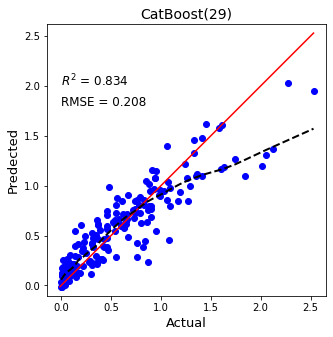

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='red', linestyle='-')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.834', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.208', fontsize = 12)
plt.title('CatBoost(29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1],  linewidth=2, c='black', linestyle='dashed')

plt.show()

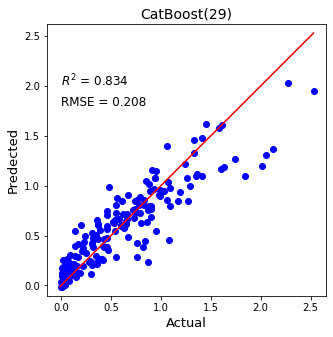

In [29]:
#Ploting The predections
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red' )
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.834', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.208', fontsize = 12)
plt.title('CatBoost(29)', fontsize = 14)
plt.show()

In [30]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'Feature Importance')

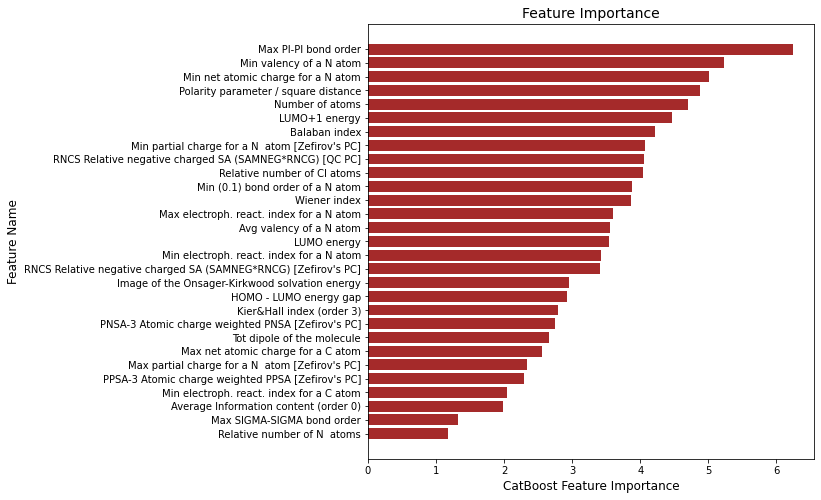

In [31]:
plt.figure(figsize=(8,8))
plt.barh(x.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='brown')
plt.xlabel("CatBoost Feature Importance", fontsize = 12)
plt.ylabel("Feature Name", fontsize = 12)
plt.title('Feature Importance', fontsize = 14)

In [32]:
import shap

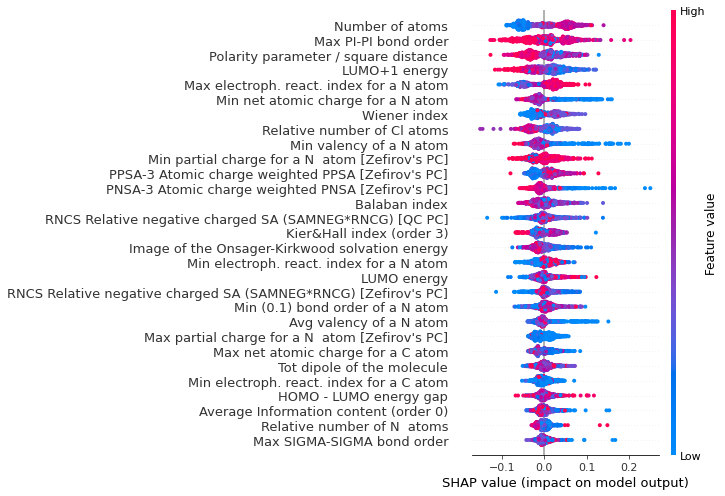

In [33]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,7], max_display=x_train.shape[0])
plt.gcf().set_size_inches(10,7)

In [48]:
shap_values

In [35]:
shap_values.shape

(844, 29)

In [51]:
print (d)

[[-0.05263258 -0.01888264 -0.03586666 ...  0.00033215 -0.00249945
  -0.02175835]
 [-0.05007624 -0.01876914 -0.03824622 ... -0.01179014 -0.01214675
  -0.00380804]
 [ 0.0812349   0.03024654  0.04770905 ...  0.10352746  0.06525043
   0.00437493]
 ...
 [-0.06022578 -0.02791816 -0.02890881 ... -0.03492721 -0.01459614
  -0.02103986]
 [ 0.04265492  0.01115011  0.01494777 ... -0.00750192 -0.00947154
   0.00860009]
 [ 0.0548065   0.00330857  0.0040391  ... -0.04171198 -0.01268502
   0.00998218]]


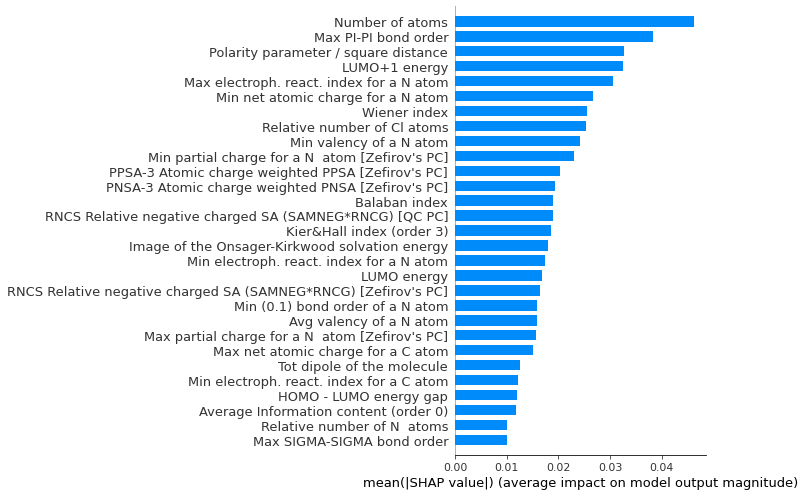

In [42]:
shap.summary_plot(shap_values, x_train,x.columns, plot_type="bar", max_display=x.shape[1], plot_size=[10,7])

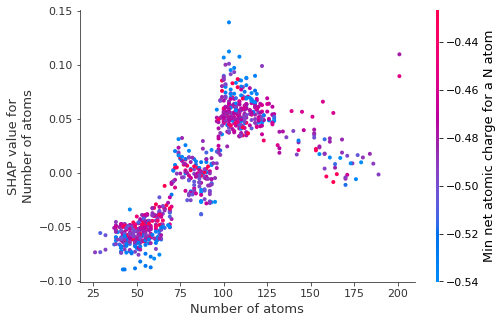

In [36]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index='auto')

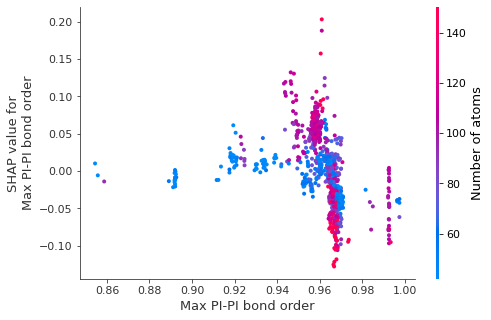

In [37]:
shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

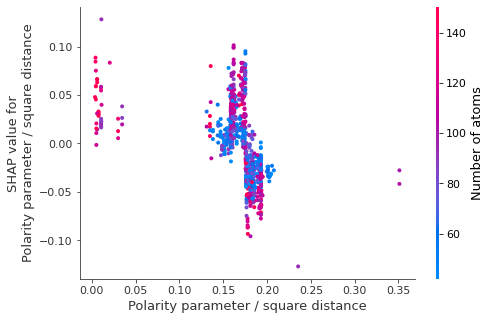

In [38]:
shap.dependence_plot("Polarity parameter / square distance", shap_values, x_train, x.columns, interaction_index='auto')

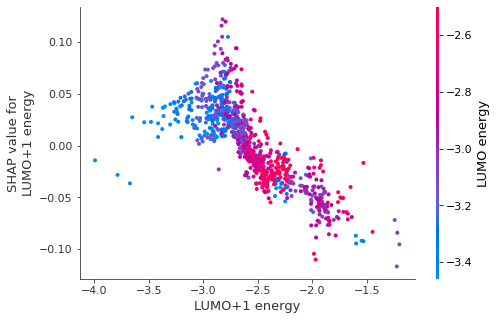

In [39]:
shap.dependence_plot("LUMO+1 energy", shap_values, x_train, x.columns, interaction_index="auto")

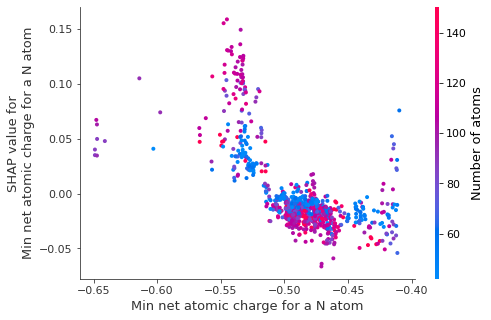

In [40]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

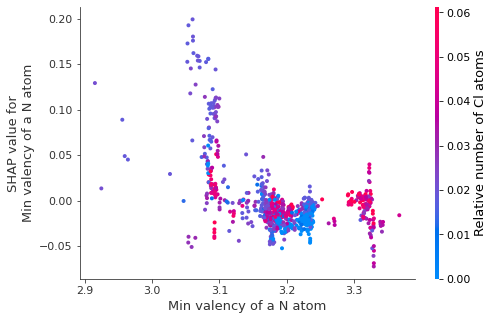

In [41]:
shap.dependence_plot("Min valency of a N atom", shap_values, x_train, x.columns, interaction_index="auto")

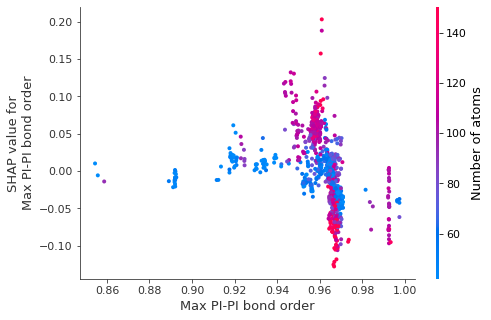

In [42]:
shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

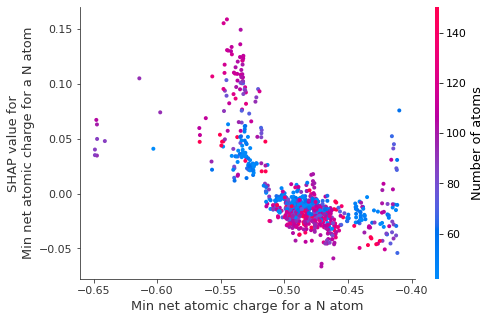

In [43]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

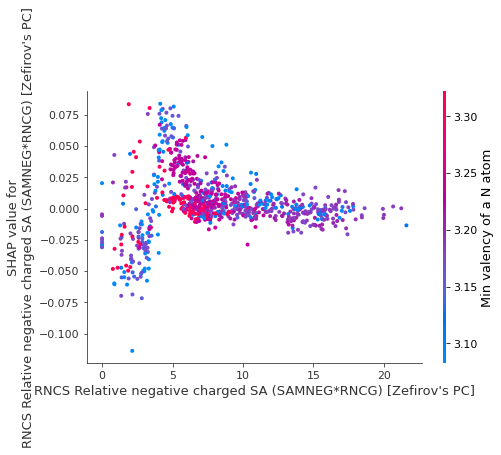

In [44]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

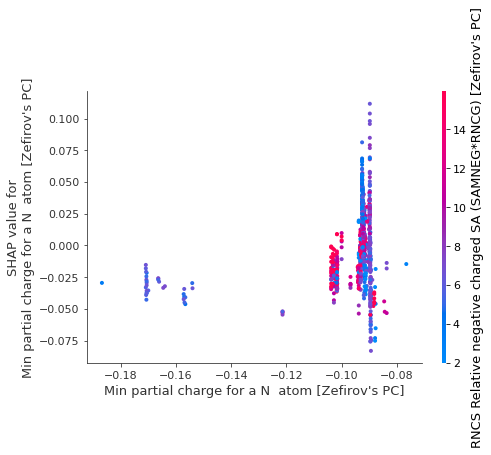

In [45]:
shap.dependence_plot("Min partial charge for a N  atom [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto") 

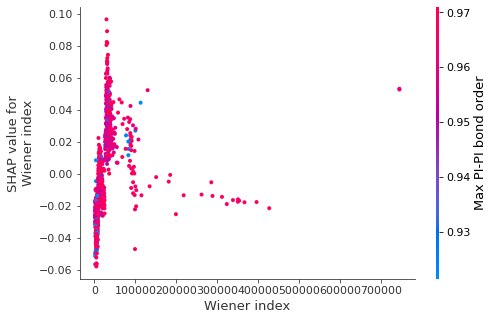

In [46]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index="auto")

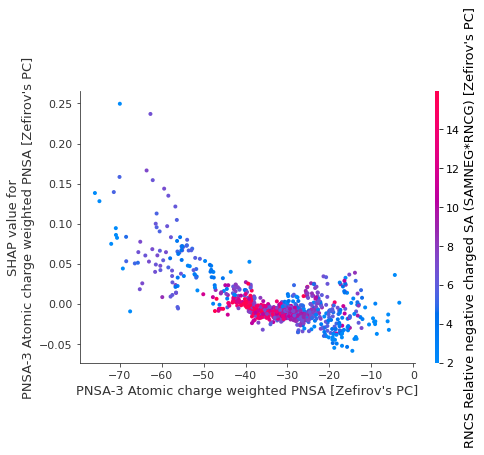

In [47]:
shap.dependence_plot("PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

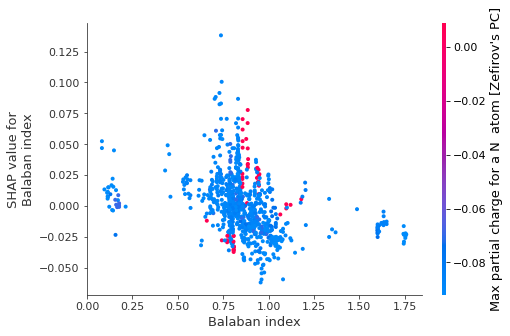

In [51]:
shap.dependence_plot("Balaban index", shap_values, x_train, x.columns, interaction_index="auto")

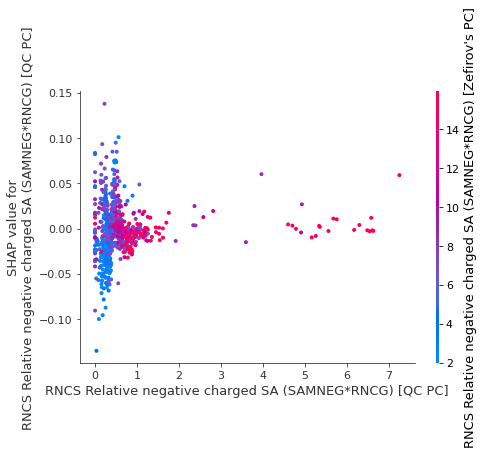

In [52]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC]", shap_values, x_train, x.columns, interaction_index="auto")

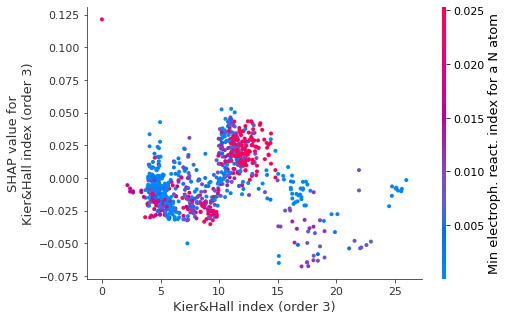

In [53]:
shap.dependence_plot("Kier&Hall index (order 3)", shap_values, x_train, x.columns, interaction_index="auto")

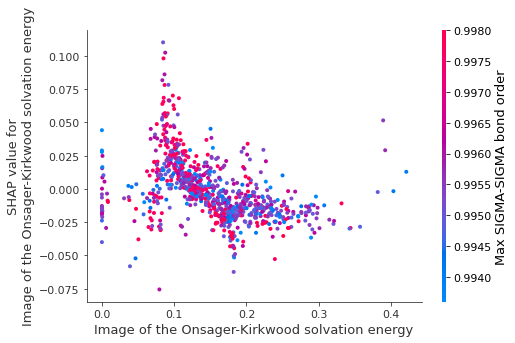

In [54]:
shap.dependence_plot("Image of the Onsager-Kirkwood solvation energy", shap_values, x_train, x.columns, interaction_index="auto")

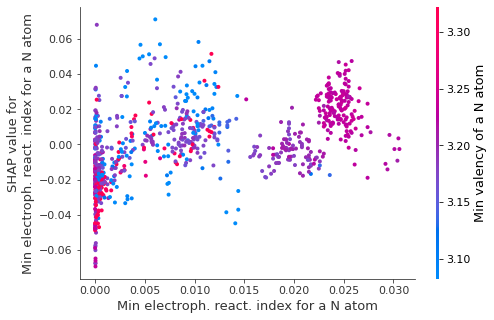

In [60]:
shap.dependence_plot("Min electroph. react. index for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

In [47]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)

In [48]:
shap_explainer_values = explainer(x_train, y_train)

In [49]:
type(shap_explainer_values)

shap._explanation.Explanation

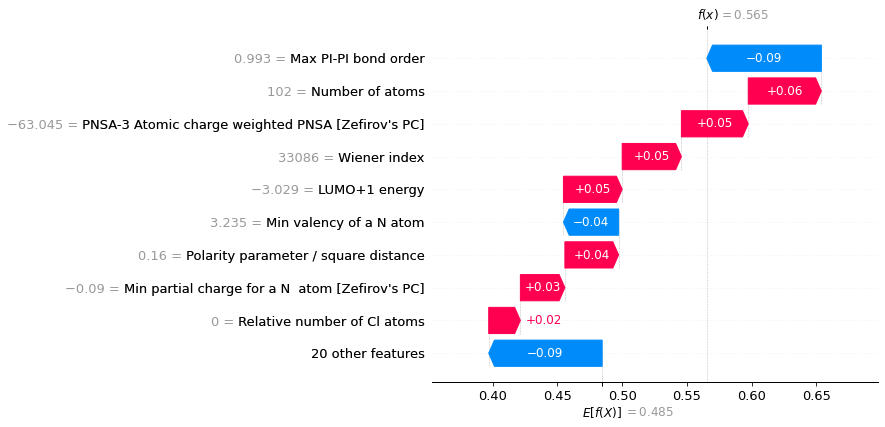

In [50]:
shap.waterfall_plot(shap_explainer_values[843],)

In [51]:
shap.initjs()

In [52]:
shap.force_plot(shap_explainer_values)

In [53]:
shap.force_plot(shap_explainer_values[10,:] ,  x_train, x.columns)

In [54]:
np.random.seed(2021)
random_mask = np.random.choice(a=[0,1], size=y_train.shape, p=[0.9,0.1])
shap.force_plot(explainer.expected_value, pd.DataFrame(shap_values)[random_mask == 1].values, x_train[random_mask == 1])

In [55]:
regressor1 = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [ ]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [ ]:
regressor_grid.fit (x_train, y_train)

In [ ]:
regressor_grid.best_params_

In [ ]:
regressor_grid.best_score_

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
PartialDependenceDisplay.from_estimator(regressor, x_train, features, target=0)

In [ ]:
shap.plots.waterfall(shap_values[x_train])